#1. Check the residuals for autocorrelation
#2. Check for seasonality
#3. Check for trends
#4. Check for outliers
#5. Check for stationarity
#6. Check for normality
#7. Check for homoscedasticity
#8. Check for multicollinearity
#9. Check for endogeneity
#10. Check for exogeneity
#11. Check for overfitting
#12. Check for underfitting
#13. Check for model performance
#14. Check for model assumptions
#15. Check for model selection
#16. Check for model validation
#17. Check for model evaluation
#18. Check for model comparison
#19. Check for model interpretation
#20. Check for model deployment
#21. Check for model monitoring
#22. Check for model maintenance
#23. Check for model optimization
#24. Check for model scalability
#25. Check for model reliability
#26. Check for model security
#27. Check for model privacy
#28. Check for model transparency
#29. Check for model explainability
#30. Check for model fairness
#31. Check for model accountability
#32. Check for model governance
#33. Check for model ethics
#34. Check for model compliance
#35. Check for model regulation

In [1]:
from datetime import datetime
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

import statsmodels.api as sm
import warnings
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# TEST 1

                               SARIMAX Results                                
Dep. Variable:            Harga Beras   No. Observations:                  678
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -3691.622
Date:                Fri, 10 May 2024   AIC                           7385.243
Time:                        18:51:54   BIC                           7389.761
Sample:                             0   HQIC                          7386.992
                                - 678                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3190.5489     28.189    113.185      0.000    3135.300    3245.798
Ljung-Box (L1) (Q):                  98.84   Jarque-Bera (JB):            156136.46
Prob(Q):                              0.00   Pr

/var/folders/3s/37cdhq1x7fdcds5p4y_vnbp00000gn/T/ipykernel_51826/4227742221.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dataset = read_csv("../../csv/Beras.csv", header=0, index_col=0, parse_dates=True, date_parser=parser)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWar

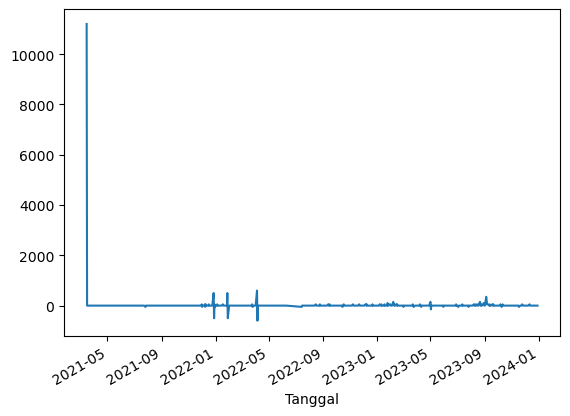

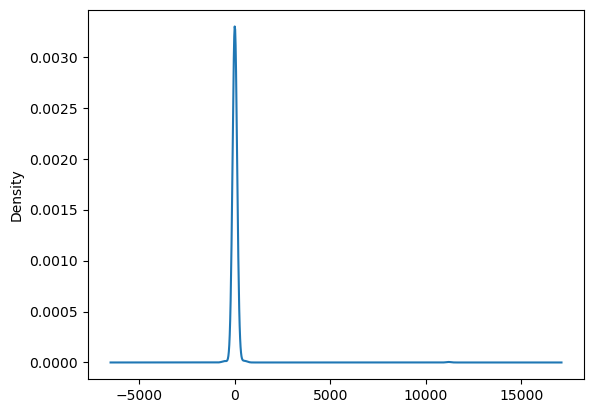

count      678.000000
mean        20.648968
std        433.649135
min       -600.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      11200.000000
dtype: float64


In [2]:
# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

# Load your dataset here
dataset = read_csv("../../csv/Beras.csv", header=0, index_col=0, parse_dates=True, date_parser=parser)

# Select the 'Harga Beras' column for analysis
series = dataset['Harga Beras']

# fit model
model = ARIMA(series, order=(0,1,0))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = model_fit.resid
residuals.plot()
pyplot.show()

# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

# summary stats of residuals
print(residuals.describe())


/var/folders/3s/37cdhq1x7fdcds5p4y_vnbp00000gn/T/ipykernel_51826/1971782200.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dataset = read_csv("https://raw.githubusercontent.com/Danazzz/beras-scm/main/csv/Beras.csv", header=0, index_col=0, parse_dates=True, date_parser=parser)


predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=12400.000000
predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=1

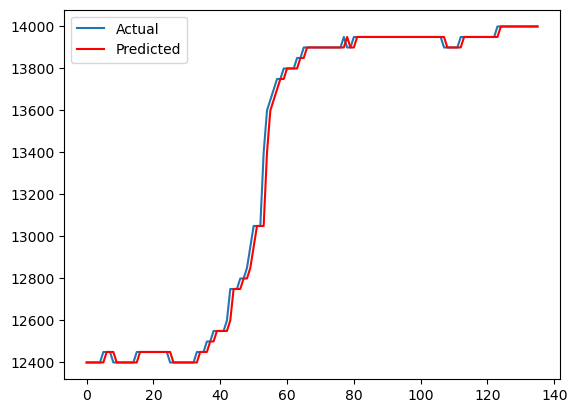

In [3]:
# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

# Load your dataset here
dataset = read_csv("https://raw.githubusercontent.com/Danazzz/beras-scm/main/csv/Beras.csv", header=0, index_col=0, parse_dates=True, date_parser=parser)

# # Select the 'Harga Beras' column for analysis
# series = dataset['Harga Beras']

# split into train and test sets
X = series.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test, label='Actual')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.legend()
pyplot.show()

In [4]:
def check_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

check_stationarity(dataset["Harga Beras"])

Results of Dickey-Fuller Test:
Test Statistic                   0.808600
p-value                          0.991774
#Lags Used                       8.000000
Number of Observations Used    669.000000
Critical Value (1%)             -3.440163
Critical Value (5%)             -2.865870
Critical Value (10%)            -2.569076
dtype: float64


Prediction for January 1, 2024: 14000.0


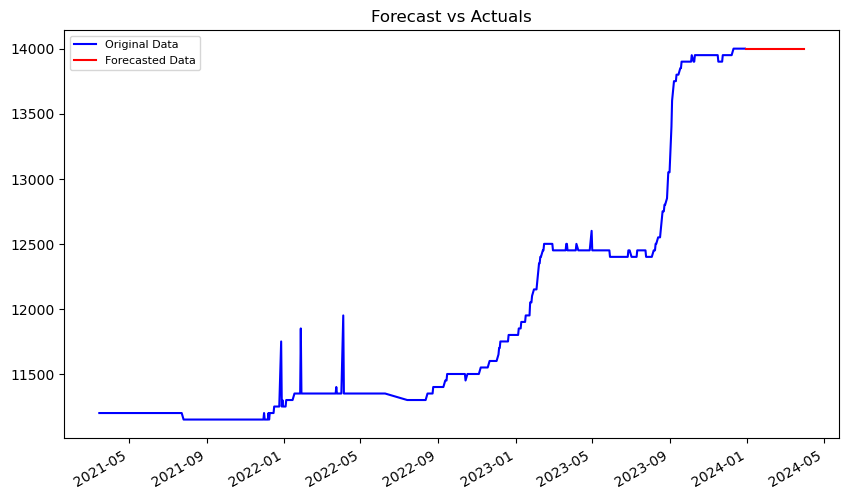

In [5]:
from datetime import datetime

# ...

# Get the last date in the dataset
last_date = dataset.index[-1]

# Calculate the number of days to forecast
days_to_forecast = (datetime(2024, 3, 31) - last_date).days

# Fit the ARIMA model on the entire dataset
model = ARIMA(history, order=(0,1,0))
model_fit = model.fit()

# Forecast for the target date
forecast_result = model_fit.forecast(steps=days_to_forecast)

# Create a date range for the forecasted data
forecast_dates = pd.date_range(start=last_date, periods=days_to_forecast + 1)[1:]

# Create a Series for the forecasted data with the correct dates
forecast_series = pd.Series(forecast_result, index=forecast_dates)

# Get the predicted value for the target date
predicted_value = forecast_series['2024-01-01']

# Print the predicted value
print(f"Prediction for January 1, 2024: {predicted_value}")

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(dataset['Harga Beras'], color='blue', label='Original Data')

# Plot the forecasted data
forecast_series.plot(color='red', label='Forecasted Data')

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# TEST 2

In [6]:
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.808600
p-value: 0.991774
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


<Axes: xlabel='Tanggal'>

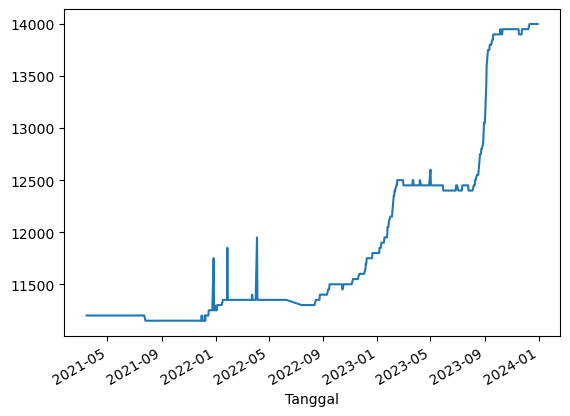

In [7]:
series.plot()

In [8]:
#Membuat fungsi untuk uji stasioneritas
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling( window=12).mean()
    rolstd = timeseries.rolling( window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

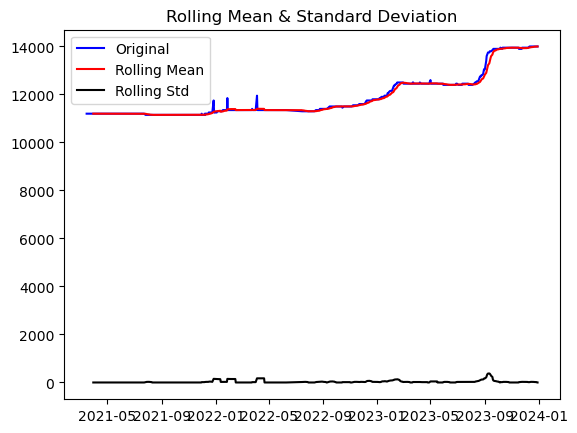

Results of Dickey-Fuller Test:
Test Statistic                   0.808600
p-value                          0.991774
#Lags Used                       8.000000
Number of Observations Used    669.000000
Critical Value (1%)             -3.440163
Critical Value (5%)             -2.865870
Critical Value (10%)            -2.569076
dtype: float64


In [9]:
#Menguji data
test_stationarity(series)

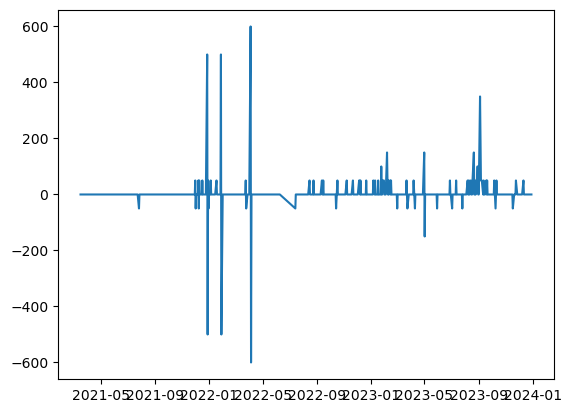

In [10]:
#Melakukan differencing pertama
ts_diff_1 = series - series.shift()
ts_diff_1 = ts_diff_1.dropna()
plt.plot(ts_diff_1)

/Library/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


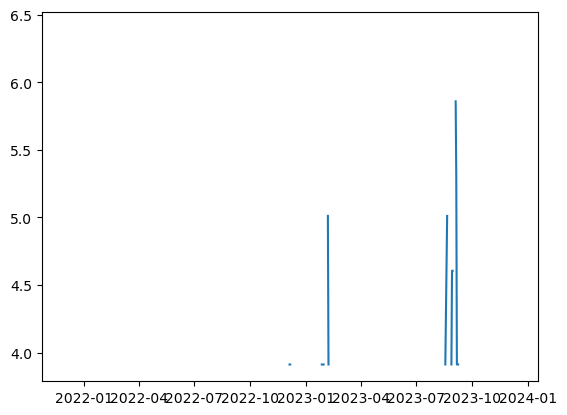

In [11]:

#Mencoba melakukan transformasi log
ts_log_dif = np.log(ts_diff_1)
plt.plot(ts_log_dif)

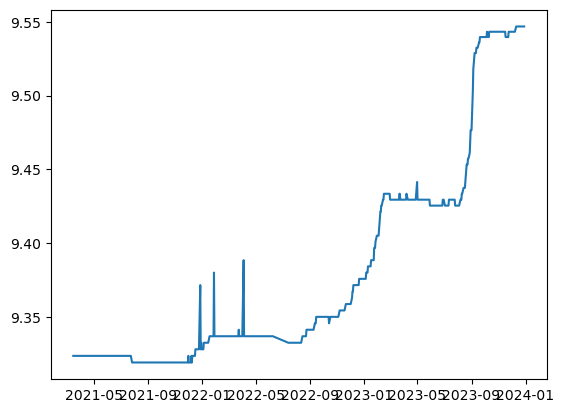

In [12]:
#Mencoba melakukan transformasi log
ts_log = np.log(series)
plt.plot(ts_log)

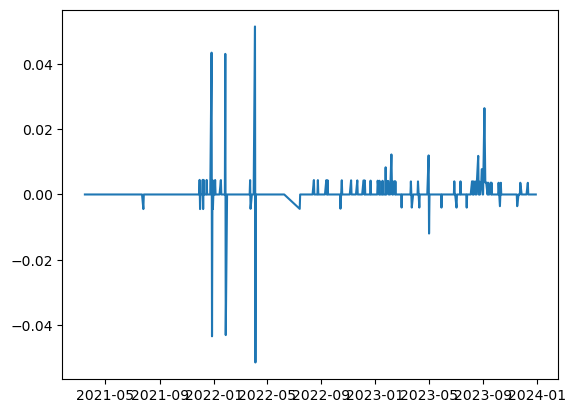

In [13]:
#Melakukan differencing setelah transform log
ts_log_1 = ts_log - ts_log.shift()
ts_log_1 = ts_log_1.dropna()
plt.plot(ts_log_1)

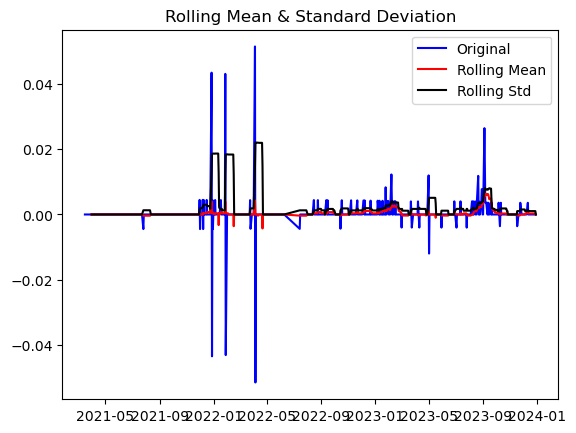

Results of Dickey-Fuller Test:
Test Statistic                -7.062029e+00
p-value                        5.193891e-10
#Lags Used                     7.000000e+00
Number of Observations Used    6.690000e+02
Critical Value (1%)           -3.440163e+00
Critical Value (5%)           -2.865870e+00
Critical Value (10%)          -2.569076e+00
dtype: float64


In [14]:
test_stationarity(ts_log_1)

In [15]:
result = adfuller(ts_log_1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.062029
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


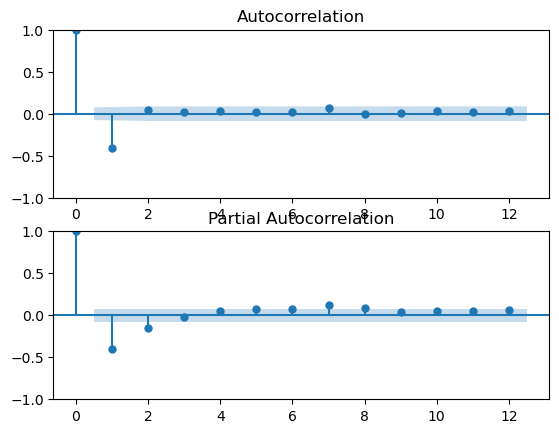

In [16]:
plt.figure()
plt.subplot(211)
plot_acf(ts_log_1, ax=plt.gca(), lags=12)
plt.subplot(212)
plot_pacf(ts_log_1, ax=plt.gca(), lags=12)
plt.show()

In [17]:
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.8)               #data trainingnya 80%
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [18]:
# p_values = range(0, 3)
# d_values = range(0, 2)
# q_values = range(0, 3)
# warnings.filterwarnings("ignore")
# evaluate_models(ts_log.values, p_values, d_values, q_values)

# TEST 3

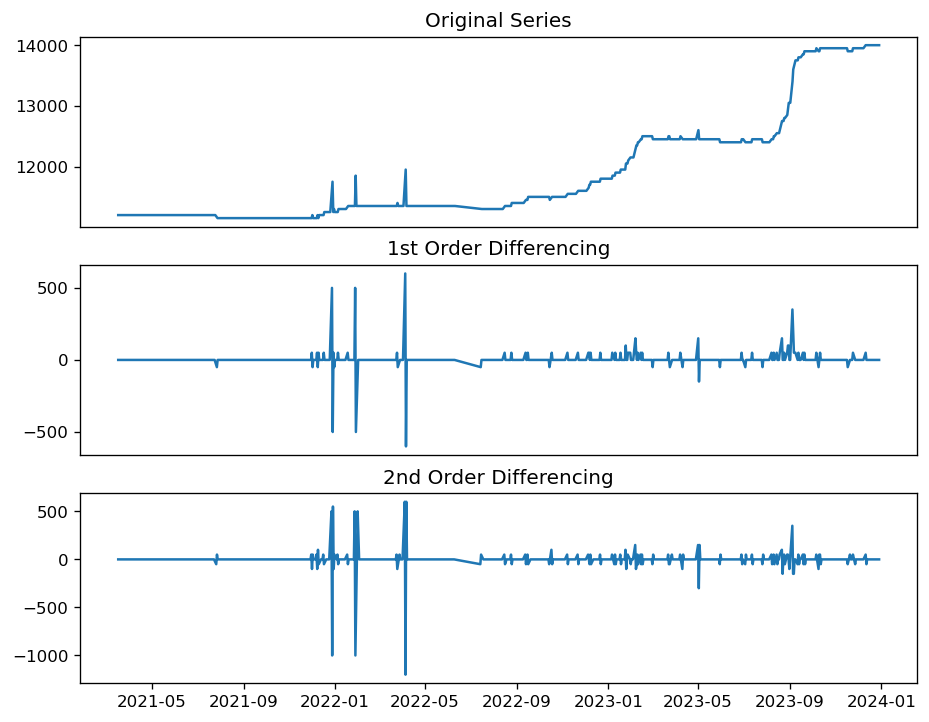

In [19]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(series); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(series.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(series.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

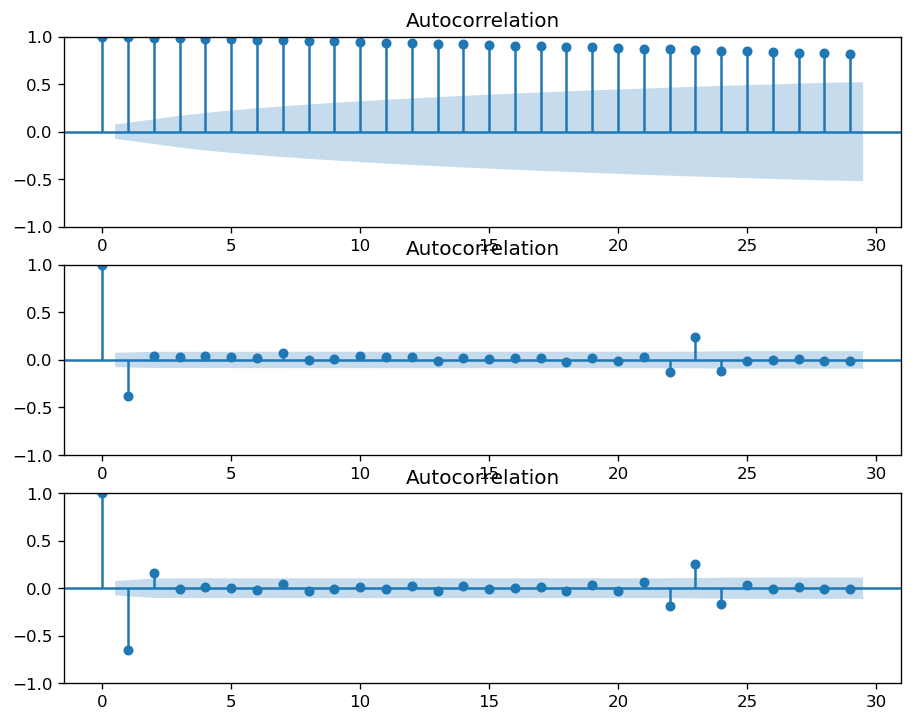

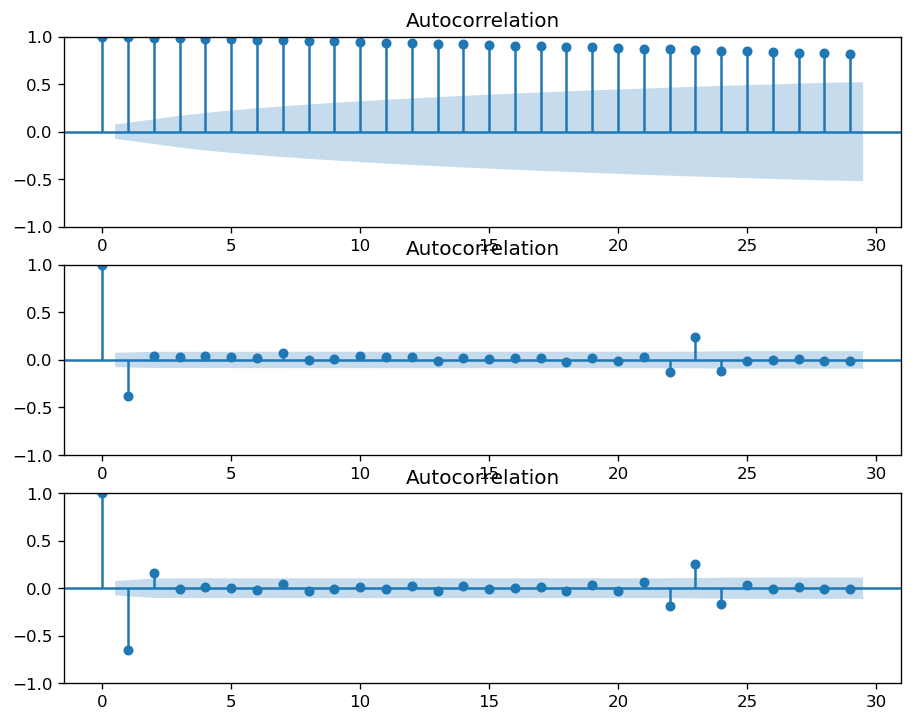

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(series, ax=ax1)
plot_acf(series.diff().dropna(), ax=ax2)
plot_acf(series.diff().diff().dropna(), ax=ax3)

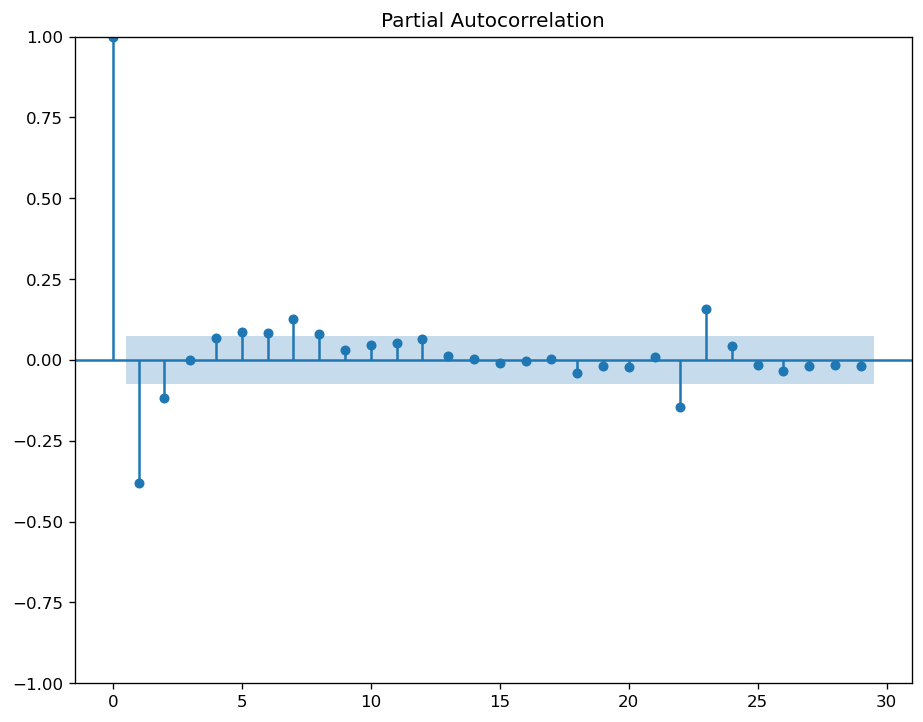

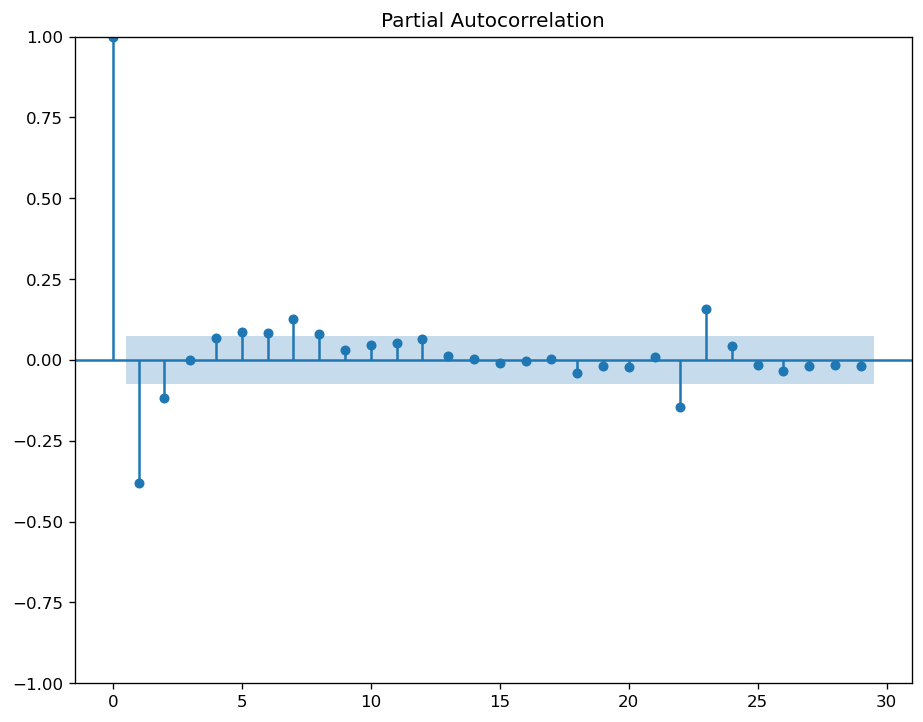

In [21]:
plot_pacf(series.diff().dropna())

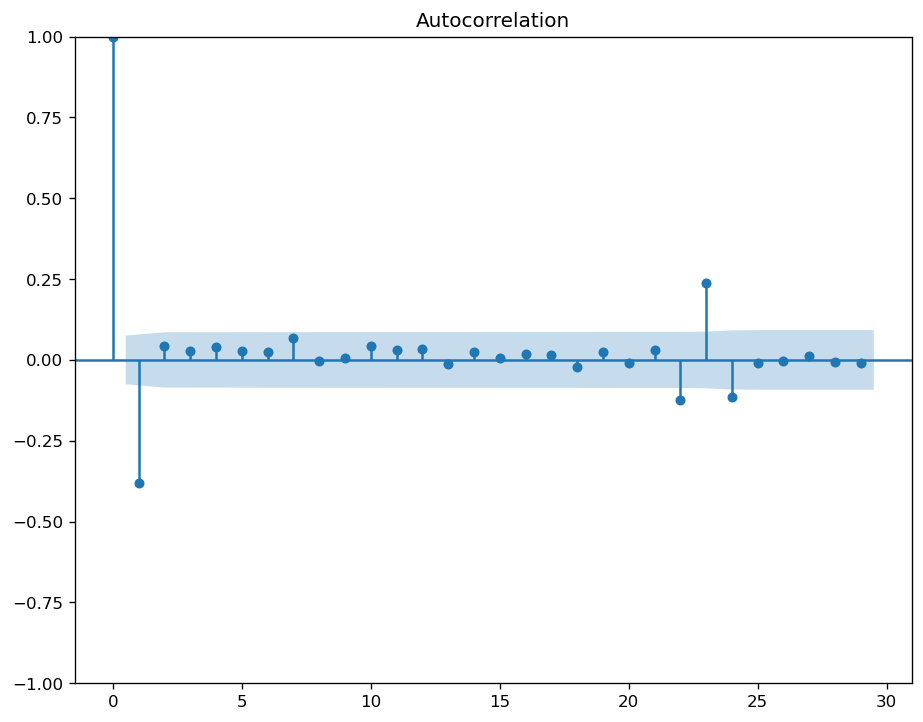

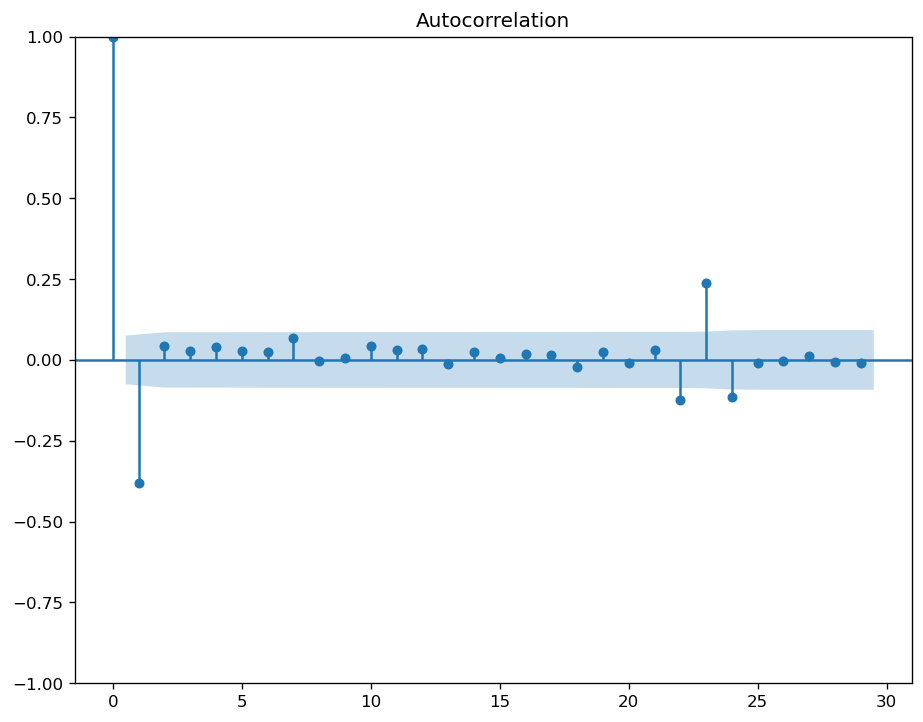

In [22]:
plot_acf(series.diff().dropna())

In [23]:
rmse = sqrt(mean_squared_error(dataset[-len(predictions):]["Harga Beras"], predictions))
mae = mean_absolute_error(dataset[-len(predictions):]["Harga Beras"], predictions)
print("Root Mean Square Error:", rmse)
print("Mean Absolute Error:", mae)

# R Square
r = r2_score(dataset[-len(predictions):]["Harga Beras"], predictions)

# Mean Square Error
mse = mean_squared_error(dataset[-len(predictions):]["Harga Beras"], predictions)

# Menampilkan hasil
print("R Square: {:.4f}".format(r))
print("Mean Square Error:", mse)

Root Mean Square Error: 43.72373160976031
Mean Absolute Error: 14.705882352941176
R Square: 0.9960
Mean Square Error: 1911.764705882353


# TEST 4 SARIMA

In [24]:
# Calculate z-scores
z_scores = stats.zscore(dataset['Harga Beras'])
# Remove outliers
dataset_no_outliers = dataset['Harga Beras'][z_scores <= 3]
# Apply a differencing operation
ts_log_diff = np.diff(dataset_no_outliers)
# Apply a differencing operation
ts_log_diff = np.diff(dataset_no_outliers)

def check_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

check_stationarity(ts_log_diff)

Results of Dickey-Fuller Test:
Test Statistic                -6.808757e+00
p-value                        2.142972e-09
#Lags Used                     7.000000e+00
Number of Observations Used    6.690000e+02
Critical Value (1%)           -3.440163e+00
Critical Value (5%)           -2.865870e+00
Critical Value (10%)          -2.569076e+00
dtype: float64


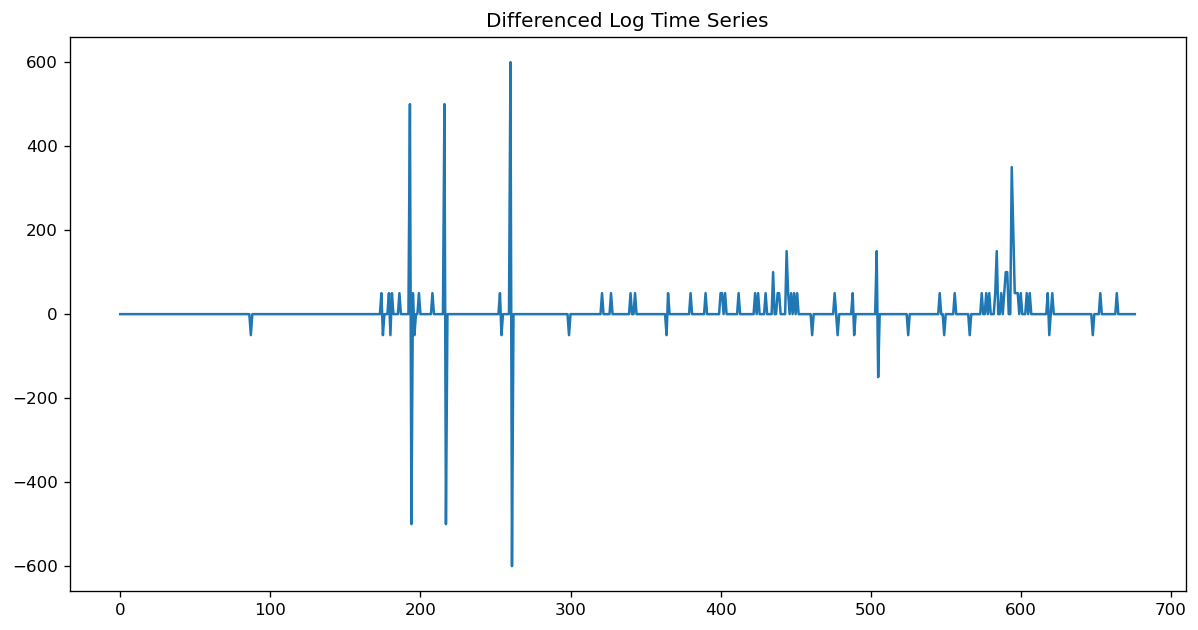

In [25]:
plt.figure(figsize=(12,6))
plt.plot(ts_log_diff)
plt.title('Differenced Log Time Series')
plt.show()

In [26]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Specify to ignore warning messages
warnings.filterwarnings("ignore")

best_aic = np.inf
best_pdq = None
temp_model = None

for param in pdq:
    try:
        temp_model = ARIMA(dataset['Harga Beras'],order=param)
        results = temp_model.fit(disp=-1)
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
    except:
        continue

print(f"Best ARIMA model: ARIMA{best_pdq} - AIC:{best_aic}")
dataset['Harga Beras']

Best ARIMA model: ARIMANone - AIC:inf


Tanggal
2021-03-15    11200
2021-03-16    11200
2021-03-17    11200
2021-03-18    11200
2021-03-19    11200
              ...  
2023-12-21    14000
2023-12-22    14000
2023-12-27    14000
2023-12-28    14000
2023-12-29    14000
Name: Harga Beras, Length: 678, dtype: int64

0


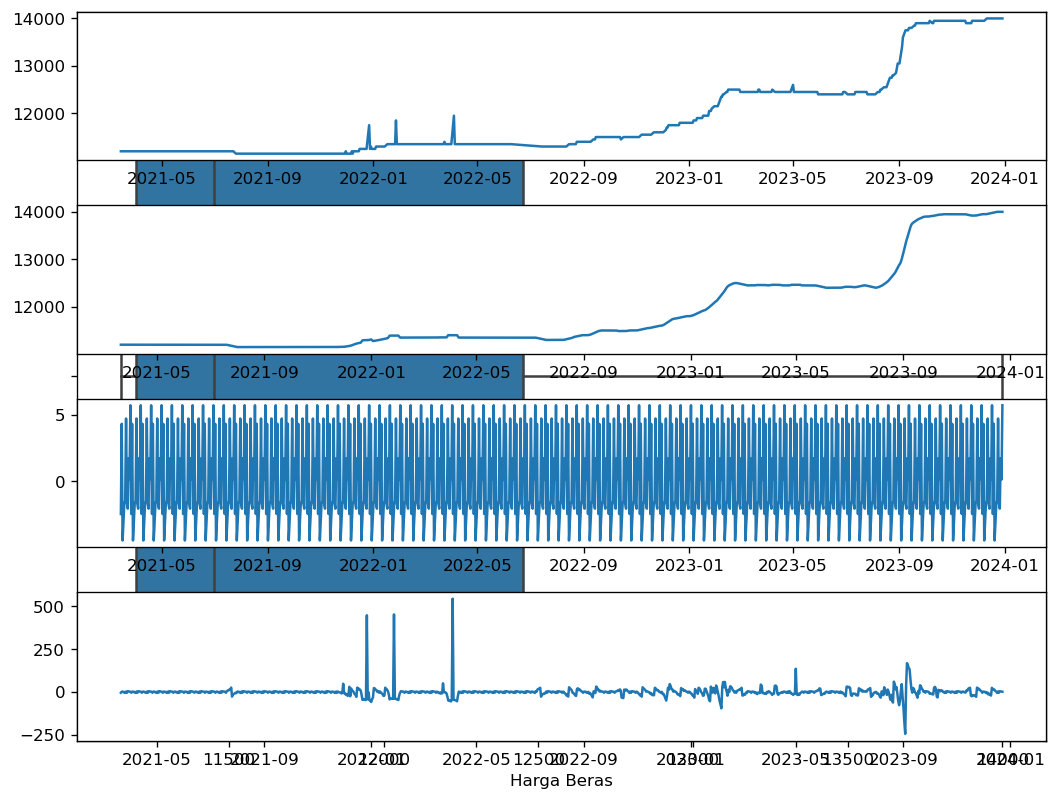

In [27]:
# 1. Check for missing values
print(dataset['Harga Beras'].isnull().sum())

# 2. Check for outliers
sns.boxplot(x=dataset['Harga Beras'])
z_scores = stats.zscore(dataset['Harga Beras'])
abs_z_scores = np.abs(z_scores)
filtered_entries = abs_z_scores < 3
new_df = dataset['Harga Beras'][filtered_entries]

# 3. Check for stationarity
# You've already done this

# 4. Check for seasonality
# Ensure the DataFrame is indexed by date
new_df.index = pd.DatetimeIndex(new_df.index)
# Set the frequency to 'D' for daily frequency
new_df = new_df.asfreq('D')

# Handle any missing values that might have been introduced by asfreq
new_df.fillna(method='ffill', inplace=True)

# decompose the time series
decomposition = seasonal_decompose(new_df, period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(dataset['Harga Beras'], label='Original')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.tight_layout()

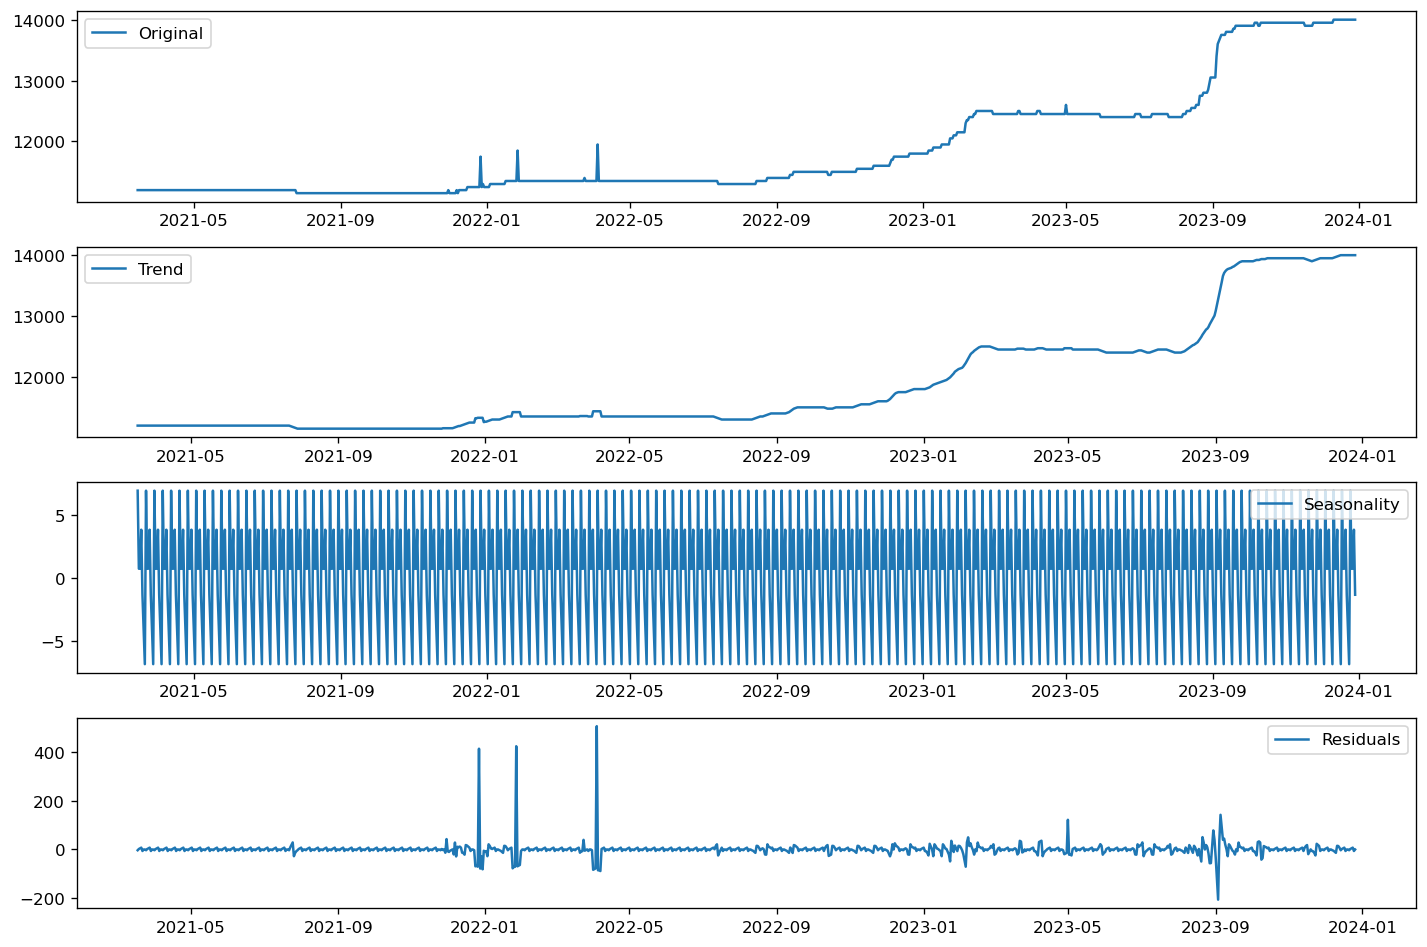

In [28]:
# Decompose the time series
decomposition = seasonal_decompose(new_df)

# Get the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Create subplots to plot each component
plt.figure(figsize=(12,8))

plt.subplot(411)
plt.plot(new_df, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

In [29]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            print(f"Trying parameters {param} and seasonal parameters {param_seasonal}")
            temp_model = sm.tsa.statespace.SARIMAX(dataset['Harga Beras'],
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                print(f"New best model: SARIMAX{best_pdq}x{best_seasonal_pdq}12 - AIC:{best_aic}")
        except Exception as e:
            print(f"Error with parameters {param} and seasonal parameters {param_seasonal}: {e}")
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Trying parameters (0, 0, 0) and seasonal parameters (0, 0, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07913D+01    |proj g|=  1.50990D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.510D-08   1.079D+01
  F =   10.791289517147076     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
New best model: SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:14634.988585251434
Trying parameters (0, 0, 0) and seasonal parameters (0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.20258D+00    |proj g|=  3.02228D-02

At iterate   15    f=  6.19513D+00    |proj g|=  9.22820D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     19      1     0     0   8.999D-06   6.195D+00
  F =   6.1950835033261562     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
New best model: SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:8404.533230510267
Trying parameters (0, 0, 0) and seasonal parameters (1, 0, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.31011D+00    |proj g|=  2.46296D+00

At iterate   10    f=  6.27999D+00    |proj g|=  5.16707D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     16      1     0     0   8.672D-04   6.276D+00
  F =   6.2761658822375797     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (0, 0, 0) and seasonal parameters (1, 1, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.19681D+00    |proj g|=  5.69589D-06

   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.01336D+01    |proj g|=  2.64696D-02

At iterate   10    f=  1.01332D+01    |proj g|=  7.56119D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     22      1     0     0   7.561D-05   1.013D+01
  F =   10.133170049816080     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (0, 0, 1) and seasonal parameters (0, 1, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.13352D+00    |proj g|=  1.70402D-01

At 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.01267D+00    |proj g|=  1.21530D-01

At iterate    5    f=  6.00570D+00    |proj g|=  2.97236D-03

At iterate   10    f=  6.00057D+00    |proj g|=  5.49741D-02

At iterate   15    f=  5.93179D+00    |proj g|=  4.41077D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   8.384D-06   5.929D+00
  F =   5.9291413475576471     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
New best

 This problem is unconstrained.



At iterate    5    f=  1.01251D+01    |proj g|=  6.01980D-04

At iterate   10    f=  1.01251D+01    |proj g|=  2.80298D-03

At iterate   15    f=  1.01246D+01    |proj g|=  2.30142D-02

At iterate   20    f=  1.01146D+01    |proj g|=  7.67765D-02

At iterate   25    f=  8.07265D+00    |proj g|=  1.04162D+01

At iterate   30    f=  6.15974D+00    |proj g|=  3.33580D+00

At iterate   35    f=  6.02644D+00    |proj g|=  4.18817D-02

At iterate   40    f=  6.02556D+00    |proj g|=  3.80532D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     40     86      1     0     0   3.805D-05   6.026D+00
  F =   6.02555604816


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00947D+01    |proj g|=  3.34260D-04

At iterate    5    f=  1.00947D+01    |proj g|=  4.01721D-04

At iterate   10    f=  1.00947D+01    |proj g|=  1.68373D-04

At iterate   15    f=  1.00947D+01    |proj g|=  4.12464D-03

At iterate   20    f=  1.00932D+01    |proj g|=  5.92340D-03

At iterate   25    f=  1.00894D+01    |proj g|=  2.14388D-02

At iterate   30    f=  9.82826D+00    |proj g|=  1.24946D-01

At iterate   35    f=  9.06900D+00    |proj g|=  2.77788D+00

At iterate   40    f=  6.93226D+00    |proj g|=  2.35858D+01

At iterate   45    f=  6.13122D+00    |proj g|=  4.79805D+00

At iterate   50    f=  6.00357D+00    |proj g|=  1.60832D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.00559D+00    |proj g|=  1.58321D-02

At iterate   10    f=  6.00516D+00    |proj g|=  1.77715D-02

At iterate   15    f=  5.99279D+00    |proj g|=  1.03527D-01

At iterate   20    f=  5.92952D+00    |proj g|=  4.06767D-03

At iterate   25    f=  5.92914D+00    |proj g|=  2.96599D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     32      1     0     0   2.589D-06   5.929D+00
  F =   5.9291371002803368     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Trying parameters (0, 1, 0) and seasonal parameters (0, 0, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Ma

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.31272D+00    |proj g|=  4.42571D-03

At iterate   10    f=  5.30958D+00    |proj g|=  1.15445D-01

At iterate   15    f=  5.28140D+00    |proj g|=  1.04496D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     25      1     0     0   2.043D-08   5.279D+00
  F =   5.2791192605874988     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
New best model: SARIMAX(0, 1, 0)x(0, 1, 1, 12)12 - AIC:7162.485717356649
Trying parameters (0, 1, 0) and seasonal parameters (1, 0, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.38092D+00    |proj g|=  1.99239D-01

At iterate    5    f=  5.31210D+00    |proj g|=  4.08465D-02

At iterate   10    f=  5.31176D+00    |proj g|=  2.03000D-02

At iterate   15    f=  5.29924D+00    |proj g|=  1.53283D-01

At iterate   20    f=  5.27928D+00    |proj g|=  4.55626D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     33      1     0     0   2.992D-05   5.279D+00
  F =   5.2790475601916658     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   4.143D-05   5.560D+00
  F =   5.5597904091160215     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (0, 1, 1) and seasonal parameters (0, 1, 1, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.29744D+00    |proj g|=  1.50836D-01

At iterate    5    f=  5.26200D+00    |proj g|=  2.15383D-02

At iterate   10    f=  5.26011D+00    |proj g|=  4.45015D-02

At 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.26491D+00    |proj g|=  2.65930D-03

At iterate   20    f=  5.26489D+00    |proj g|=  2.72848D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     24      1     0     0   2.728D-06   5.265D+00
  F =   5.2648922038294401     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Trying parameters (0, 1, 1) and seasonal parameters (1, 1, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.39722D+00    |proj g|=  8.93667D-02

At 

 This problem is unconstrained.
 This problem is unconstrained.


Trying parameters (0, 1, 1) and seasonal parameters (1, 1, 1, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.31235D+00    |proj g|=  1.24849D-01

At iterate    5    f=  5.26196D+00    |proj g|=  2.59424D-02

At iterate   10    f=  5.26133D+00    |proj g|=  3.81089D-02

At iterate   15    f=  5.21063D+00    |proj g|=  2.18301D-01

At iterate   20    f=  5.19331D+00    |proj g|=  9.31874D-03

At iterate   25    f=  5.19326D+00    |proj g|=  2.36797D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip 

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   15    f=  5.60203D+00    |proj g|=  7.24202D-02

At iterate   20    f=  5.59409D+00    |proj g|=  2.50148D+00

At iterate   25    f=  5.37695D+00    |proj g|=  1.44856D+00

At iterate   30    f=  5.36081D+00    |proj g|=  3.48600D-02

At iterate   35    f=  5.35691D+00    |proj g|=  1.95297D-01

At iterate   40    f=  5.35489D+00    |proj g|=  1.02769D+00

At iterate   45    f=  5.35412D+00    |proj g|=  6.09725D-01

At iterate   50    f=  5.35389D+00    |proj g|=  2.24569D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50     71      1     0     0   2.246D-01   5.354D+00
  F =   5.35389248922

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  5.36932D+00    |proj g|=  5.05368D-01

At iterate   10    f=  5.35410D+00    |proj g|=  8.02957D-03

At iterate   15    f=  5.35403D+00    |proj g|=  7.89790D-02

At iterate   20    f=  5.34747D+00    |proj g|=  6.69182D-01

At iterate   25    f=  5.29546D+00    |proj g|=  1.35090D+00

At iterate   30    f=  5.28650D+00    |proj g|=  5.26482D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     46      1     0     0   8.369D-05   5.287D+00
  F =   5.2865041436453968     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (1, 0, 0) and seasonal parameters

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.36488D+00    |proj g|=  5.52911D-02

At iterate   15    f=  5.36102D+00    |proj g|=  6.41262D+00

At iterate   20    f=  5.35467D+00    |proj g|=  7.33520D-01

At iterate   25    f=  5.35325D+00    |proj g|=  4.77954D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     60      1     0     0   4.780D-02   5.353D+00
  F =   5.3532452402864070     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (1, 0, 0) and seasonal parameters (1, 1, 0, 12)



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.77251D+00    |proj g|=  7.48509D-01

At iterate    5    f=  5.47797D+00    |proj g|=  6.25057D-03

At iterate   10    f=  5.47790D+00    |proj g|=  2.10693D-02

At iterate   15    f=  5.47415D+00    |proj g|=  1.22332D-01

At iterate   20    f=  5.47281D+00    |proj g|=  2.38733D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     23      1     0     0   2.387D-06   5.473D+00
  F =   5.4728116242088518     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.51226D+00    |proj g|=  1.85480D+00

At iterate   10    f=  5.50840D+00    |proj g|=  1.93869D+00

At iterate   15    f=  5.50829D+00    |proj g|=  3.02419D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     28      1     0     0   5.673D-01   5.508D+00
  F =   5.5082171449793211     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (1, 0, 1) and seasonal parameters (0, 1, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At 

 This problem is unconstrained.
 This problem is unconstrained.


Trying parameters (1, 0, 1) and seasonal parameters (0, 1, 1, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.55265D+00    |proj g|=  5.90546D-01

At iterate    5    f=  5.28170D+00    |proj g|=  9.58489D-01

At iterate   10    f=  5.26773D+00    |proj g|=  5.78020D-02

At iterate   15    f=  5.26166D+00    |proj g|=  2.40466D-01

At iterate   20    f=  5.20299D+00    |proj g|=  2.35103D-01

At iterate   25    f=  5.19759D+00    |proj g|=  7.87183D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f=  5.19759D+00    |proj g|=  1.12527D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     72      2     0     0   1.125D-04   5.198D+00
  F =   5.1975902629321507     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (1, 0, 1) and seasonal parameters (1, 0, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70357D+00    |proj g|=  9.38027D-01

At iterate    5    f=  5.56310D+00    |proj g|=  1.97883D+00

At 

 This problem is unconstrained.



At iterate   20    f=  5.27169D+00    |proj g|=  4.07639D+00

At iterate   25    f=  5.27064D+00    |proj g|=  2.77200D-02

At iterate   30    f=  5.27036D+00    |proj g|=  4.44911D+00

At iterate   35    f=  5.26526D+00    |proj g|=  1.13440D+01

At iterate   40    f=  5.26461D+00    |proj g|=  1.14829D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     78      1     0     0   1.148D-01   5.265D+00
  F =   5.2646140016652270     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (1, 0, 1) and seasonal parameters (1, 1, 0, 12)



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.74656D+00    |proj g|=  7.75940D-01

At iterate    5    f=  5.40859D+00    |proj g|=  3.47794D-02

At iterate   10    f=  5.40808D+00    |proj g|=  1.07245D-02

At iterate   15    f=  5.40419D+00    |proj g|=  7.38496D-02

At iterate   20    f=  5.40182D+00    |proj g|=  9.39076D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     35      1     0     0   2.503D-05   5.402D+00
  F =   5.4018179364615584     

CONVERG


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


Trying parameters (1, 0, 1) and seasonal parameters (1, 1, 1, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.57532D+00    |proj g|=  5.51990D-01

At iterate    5    f=  5.27955D+00    |proj g|=  2.68148D-01

At iterate   10    f=  5.26546D+00    |proj g|=  6.50137D-02

At iterate   15    f=  5.26527D+00    |proj g|=  1.06894D-02

At iterate   20    f=  5.26494D+00    |proj g|=  3.23950D-01

At iterate   25    f=  5.23737D+00    |proj g|=  2.08770D+00

At iterate   30    f=  5.20379D+00    |proj g|=  2.78820D-01

At iterate   35    f=  5.19773D+00    |proj g|=  3.00091D-01

At iterate   40    f=  5.19748D+00    |proj g|=  2.00229D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.27388D+00    |proj g|=  1.18177D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     15      1     0     0   2.744D-06   5.274D+00
  F =   5.2738790081790405     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Trying parameters (1, 1, 0) and seasonal parameters (0, 1, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.58215D+00    |proj g|=  5.84972D-06

           * * *

Tit   = total number of iterations
Tnf   = tota

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.27389D+00    |proj g|=  3.10105D-04

At iterate   15    f=  5.27386D+00    |proj g|=  2.69040D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     22      1     0     0   1.050D-05   5.274D+00
  F =   5.2738527246312898     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (1, 1, 0) and seasonal parameters (1, 1, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.39324D+00    |proj g|=  2.33125D-02

At 

 This problem is unconstrained.
 This problem is unconstrained.


Trying parameters (1, 1, 0) and seasonal parameters (1, 1, 1, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.32044D+00    |proj g|=  1.42629D-01

At iterate    5    f=  5.27829D+00    |proj g|=  2.16379D-02

At iterate   10    f=  5.27723D+00    |proj g|=  4.08379D-02

At iterate   15    f=  5.21757D+00    |proj g|=  1.64423D-01

At iterate   20    f=  5.20211D+00    |proj g|=  1.59782D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     31      1     0     

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.26120D+00    |proj g|=  2.82766D-03

At iterate   20    f=  5.26118D+00    |proj g|=  3.59608D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     25      1     0     0   1.139D-05   5.261D+00
  F =   5.2611840932361575     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (1, 1, 1) and seasonal parameters (0, 1, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.55902D+00    |proj g|=  3.29157D-02

At 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.26069D+00    |proj g|=  3.50799D-02

At iterate   10    f=  5.25849D+00    |proj g|=  1.49326D-02

At iterate   15    f=  5.24171D+00    |proj g|=  2.28269D-01

At iterate   20    f=  5.19018D+00    |proj g|=  4.35869D-02

At iterate   25    f=  5.18908D+00    |proj g|=  2.52547D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     35      1     0     0   1.337D-05   5.189D+00
  F =   5.1890769005634692     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
New best model: SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 - AIC:7044.388277164065
Trying parameters (1, 1, 1) and seasonal

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.26260D+00    |proj g|=  4.68909D-02

At iterate    5    f=  5.26134D+00    |proj g|=  3.74641D-03

At iterate   10    f=  5.26116D+00    |proj g|=  2.19310D-03

At iterate   15    f=  5.26115D+00    |proj g|=  1.42034D-04

At iterate   20    f=  5.26114D+00    |proj g|=  1.72307D-03

At iterate   25    f=  5.26114D+00    |proj g|=  2.67844D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     28      1     0     0   

 This problem is unconstrained.



At iterate   10    f=  5.38144D+00    |proj g|=  1.98436D-02

At iterate   15    f=  5.37549D+00    |proj g|=  4.70433D-02

At iterate   20    f=  5.37352D+00    |proj g|=  5.19851D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     26      1     0     0   5.199D-07   5.374D+00
  F =   5.3735217991241857     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Trying parameters (1, 1, 1) and seasonal parameters (1, 1, 1, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At 

 This problem is unconstrained.



At iterate    5    f=  5.26075D+00    |proj g|=  3.11817D-02

At iterate   10    f=  5.25908D+00    |proj g|=  3.04513D-02

At iterate   15    f=  5.25299D+00    |proj g|=  1.02274D-01

At iterate   20    f=  5.21098D+00    |proj g|=  1.33682D-01

At iterate   25    f=  5.18898D+00    |proj g|=  3.33466D-03

At iterate   30    f=  5.18896D+00    |proj g|=  8.90208D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     41      1     0     0   1.642D-05   5.189D+00
  F =   5.1889565420443438     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Best SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 model - AIC:7

In [30]:
best_model = sm.tsa.statespace.SARIMAX(dataset['Harga Beras'],
                                       order=(1, 1, 1),
                                       seasonal_order=(0, 1, 1, 12),
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
results = best_model.fit()
start_date = dataset.index[-1]
pred = results.get_prediction(start=start_date, dynamic=False)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.29452D+00    |proj g|=  1.51563D-01


 This problem is unconstrained.



At iterate    5    f=  5.26069D+00    |proj g|=  3.50799D-02

At iterate   10    f=  5.25849D+00    |proj g|=  1.49326D-02

At iterate   15    f=  5.24171D+00    |proj g|=  2.28269D-01

At iterate   20    f=  5.19018D+00    |proj g|=  4.35869D-02

At iterate   25    f=  5.18908D+00    |proj g|=  2.52547D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     35      1     0     0   1.337D-05   5.189D+00
  F =   5.1890769005634692     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [31]:
# Calculate predictions for the training dataset to evaluate in-sample prediction performance
pred_insample = results.get_prediction(start=pd.to_datetime('2021-03-15'), dynamic=False)
pred_insample_conf = pred_insample.conf_int()

# Calculate MAPE and RMSE
y_forecasted = pred_insample.predicted_mean
y_truth = dataset['Harga Beras'][y_forecasted.index]

# Compute the mean absolute percentage error
mape = np.mean(np.abs((y_truth - y_forecasted) / y_truth)) * 100

# Compute the root mean square error
rmse = sqrt(mean_squared_error(y_truth, y_forecasted))

print('The Mean Absolute Percentage Error for the forecast of Harga Beras is {:.2f}%'.format(mape))
print('The Root Mean Square Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Absolute Percentage Error for the forecast of Harga Beras is 0.41%
The Root Mean Square Error of our forecasts is 520.96


The Mean Absolute Percentage Error for the forecast of Harga Beras is 0.41%
The Root Mean Square Error of our forecasts is 520.96


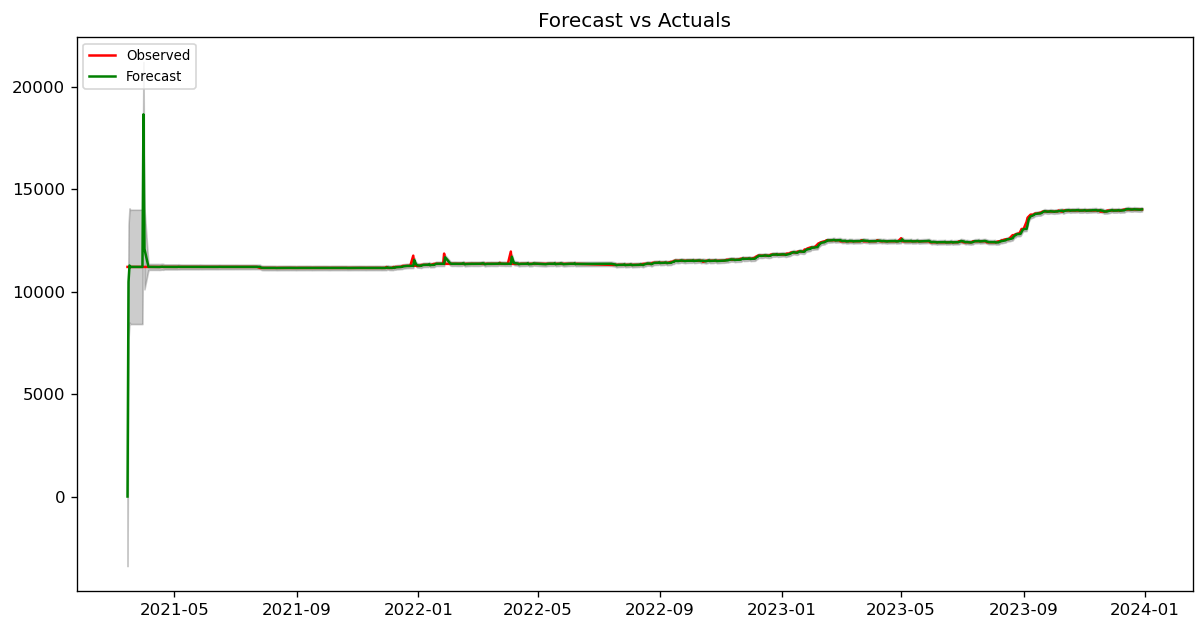

In [32]:
import matplotlib.pyplot as plt

# Calculate predictions for the training dataset to evaluate in-sample prediction performance
pred_insample = results.get_prediction(start=pd.to_datetime('2021-03-15'), dynamic=False)
pred_insample_conf = pred_insample.conf_int()

# Calculate MAPE and RMSE
y_forecasted = pred_insample.predicted_mean
y_truth = dataset['Harga Beras'][y_forecasted.index]

# Compute the mean absolute percentage error
mape = np.mean(np.abs((y_truth - y_forecasted) / y_truth)) * 100

# Compute the root mean square error
rmse = sqrt(mean_squared_error(y_truth, y_forecasted))

print('The Mean Absolute Percentage Error for the forecast of Harga Beras is {:.2f}%'.format(mape))
print('The Root Mean Square Error of our forecasts is {}'.format(round(rmse, 2)))

# Plot the predictions
plt.figure(figsize=(12,6))
plt.plot(y_truth.index, y_truth, label='Observed', color='r')
plt.plot(y_forecasted.index, y_forecasted, label='Forecast', color='g')

# Plot the confidence intervals
plt.fill_between(pred_insample_conf.index,
                 pred_insample_conf.iloc[:, 0],
                 pred_insample_conf.iloc[:, 1], color='k', alpha=.2)

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

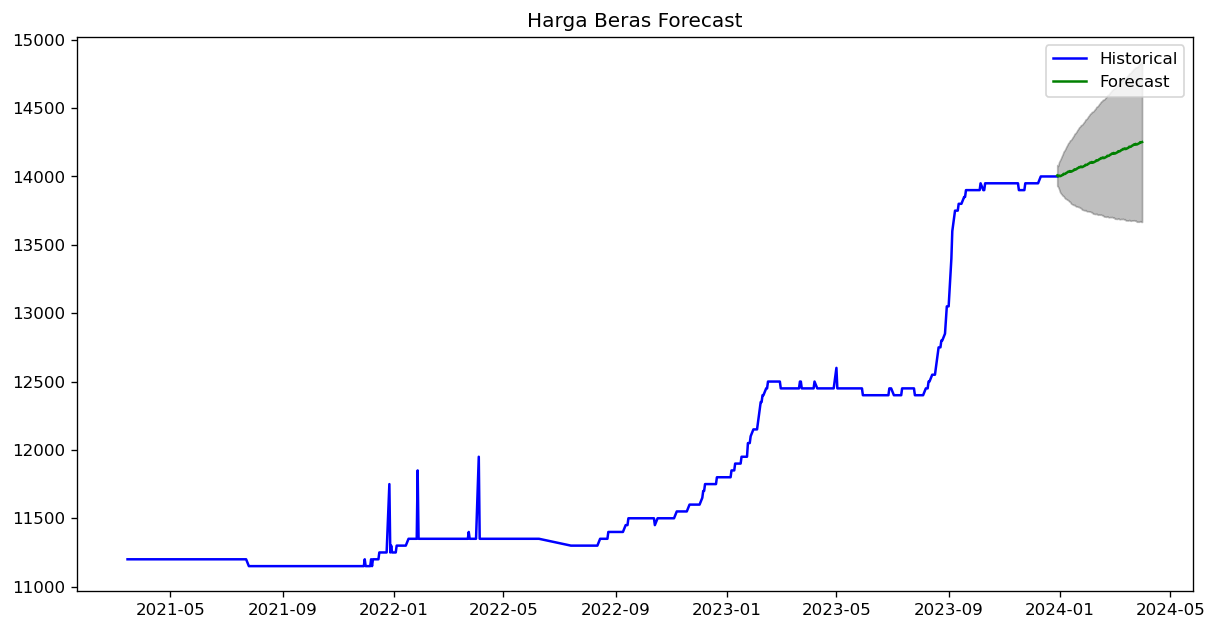

In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Resample the data to ensure a continuous daily frequency
dataset_resampled = dataset.resample('D').asfreq()

# Fill any missing values
dataset_resampled['Harga Beras'].interpolate(method='time', inplace=True)

# Fit the SARIMA model on the resampled data
model = SARIMAX(dataset_resampled['Harga Beras'], order=(5,1,0), seasonal_order=(0,1,1,12))
results = model.fit(disp=0)

# Get the last date in the resampled dataset
last_date = dataset_resampled.index[-1]

# Calculate the end date for the forecast
end_date = '2024-03-31'

# Forecast until March 2024
forecast = results.get_prediction(start=pd.to_datetime(last_date), end=pd.to_datetime(end_date), dynamic=False)
forecast_conf = forecast.conf_int()

# Plot the forecast along with the confidence interval
plt.figure(figsize=(12,6))
plt.plot(dataset_resampled.index, dataset_resampled['Harga Beras'], label='Historical', color='blue')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast', color='green')
plt.fill_between(forecast_conf.index,
                 forecast_conf.iloc[:, 0],
                 forecast_conf.iloc[:, 1], color='k', alpha=.25)
plt.title('Harga Beras Forecast')
plt.legend()
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from numpy import sqrt

# Split the data into training and test sets
train = dataset_resampled['Harga Beras'][:-30]
test = dataset_resampled['Harga Beras'][-30:]

# Fit the SARIMA model on the training data
model = SARIMAX(train, order=(5,1,0), seasonal_order=(0,1,1,12))
results = model.fit(disp=0)

# Generate predictions for the test set
predictions = results.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Calculate error metrics
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
mae = mean_absolute_error(test, predictions)
r2 = r2_score(test, predictions)

mse, rmse, mae, r2

(413.0460398149113,
 20.323534136928824,
 17.121578045038707,
 0.20341120892838638)

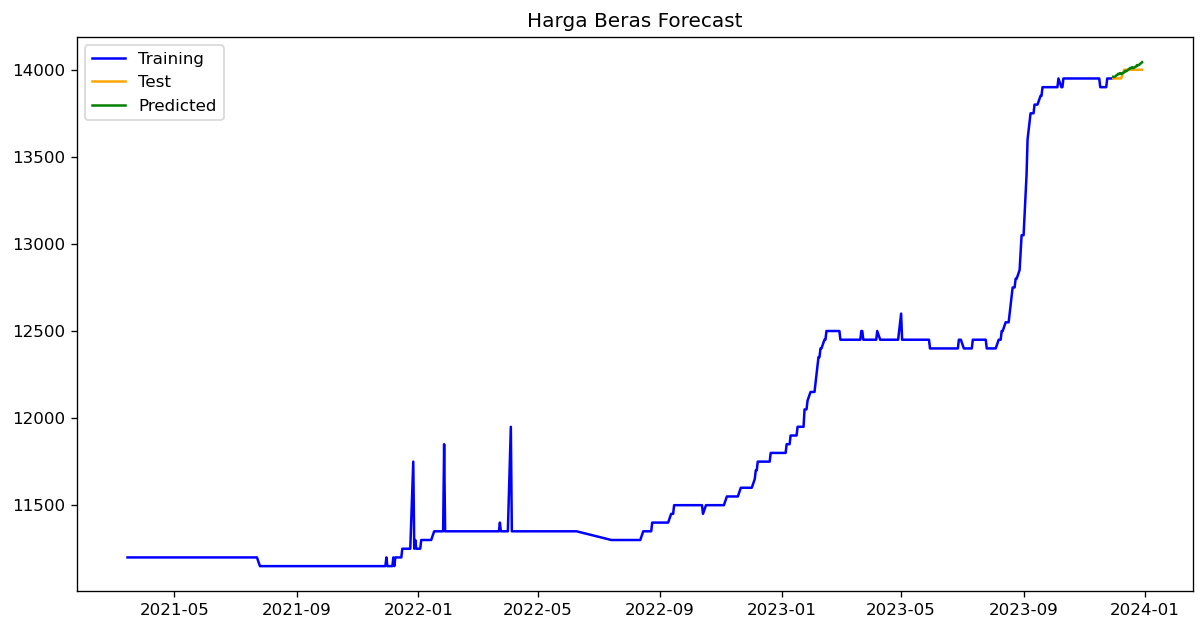

In [58]:
# Plot the actual values and the predicted values
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Training', color='blue')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(predictions.index, predictions, label='Predicted', color='green')
plt.legend(loc='best')
plt.title('Harga Beras Forecast')
plt.show()

# TEST 5 SARIMAX

In [73]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q, and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q, and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = SARIMAX(train_data['Harga Beras'],
                                 order = param,
                                 seasonal_order = param_seasonal,
                                 exog = train_data.drop('Harga Beras', axis=1),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = temp_model.fit(maxiter=100)

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.49738D+00    |proj g|=  1.00847D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      1      3      1     0     0   5.020D-04   8.497D+00
  F =   8.4973751846152634     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.6

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.69049D+00    |proj g|=  2.52956D-01

At iterate   10    f=  5.68550D+00    |proj g|=  2.11533D-01

At iterate   15    f=  5.68343D+00    |proj g|=  3.34865D-02

At iterate   20    f=  5.68296D+00    |proj g|=  1.01207D-01

At iterate   25    f=  5.68270D+00    |proj g|=  5.84311D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     29     63      1     0     0   7.669D-02   5.683D+00
  F =   5.6826224608082834     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.23385D+00    |proj g|=  3.49565D-02

At iterate   10    f=  7.93993D+00    |proj g|=  1.16374D-01

At iterate   15    f=  7.19785D+00    |proj g|=  4.62124D-01

At iterate   20    f=  7.01095D+00    |proj g|=  3.25189D-01

At iterate   25    f=  6.45843D+00    |proj g|=  7.58584D-01

At iterate   30    f=  6.27412D+00    |proj g|=  1.36975D-01

At iterate   35    f=  6.11187D+00    |proj g|=  1.83983D-01

At iterate   40    f=  5.86141D+00    |proj g|=  3.67897D-01

At iterate   45    f=  5.68842D+00    |proj g|=  7.70712D-02

At iterate   50    f=  5.67115D+00    |proj g|=  1.16637D-02

At iterate   55    f=  5.67114D+00    |proj g|=  2.52807D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   10    f=  5.54588D+00    |proj g|=  1.03903D-01

At iterate   15    f=  5.54390D+00    |proj g|=  3.95845D-02

At iterate   20    f=  5.54377D+00    |proj g|=  4.43747D-03

At iterate   25    f=  5.54375D+00    |proj g|=  2.35290D-03

At iterate   30    f=  5.54374D+00    |proj g|=  1.86506D-03

At iterate   35    f=  5.54374D+00    |proj g|=  5.17904D-04

At iterate   40    f=  5.54374D+00    |proj g|=  1.64262D-03

At iterate   45    f=  5.54373D+00    |proj g|=  3.53760D-03

At iterate   50    f=  5.54369D+00    |proj g|=  7.41517D-03

At iterate   55    f=  5.54355D+00    |proj g|=  1.32617D-02

At iterate   60    f=  5.54347D+00    |proj g|=  8.11711D-02

At iterate   65    f=  5.54331D+00    |proj g|=  1.91947D-03

At iterate   70    f=  5.54331D+00    |proj g|=  1.62899D-03

At iterate   75    f=  5.54330D+00    |proj g|=  3.80918D-04

At iterate   80    f=  5.54330D+00    |proj g|=  9.02499D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate    5    f=  5.69595D+00    |proj g|=  3.41712D-01

At iterate   10    f=  5.68594D+00    |proj g|=  6.67204D-01

At iterate   15    f=  5.68079D+00    |proj g|=  8.25083D-02

At iterate   20    f=  5.68060D+00    |proj g|=  1.92457D-01

At iterate   25    f=  5.68009D+00    |proj g|=  7.97603D-02

At iterate   30    f=  5.67976D+00    |proj g|=  3.35774D-02

At iterate   35    f=  5.67946D+00    |proj g|=  1.98802D-01

At iterate   40    f=  5.67877D+00    |proj g|=  6.95908D-02

At iterate   45    f=  5.67871D+00    |proj g|=  3.98442D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   50    f=  5.67866D+00    |proj g|=  5.71179D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     51     83      2     0     0   4.678D-02   5.679D+00
  F =   5.6786570352462222     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68971D+00    |proj g|=  4.93444D+00

At iterate    5    f=  5.68564D+00    |proj g|=  3.71966D-01

At iterate   10    f=  5.67355D+00    |proj g|=  4.86442D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.55617D+00    |proj g|=  3.36197D-01

At iterate    5    f=  5.55374D+00    |proj g|=  2.01267D-02

At iterate   10    f=  5.55336D+00    |proj g|=  1.65977D-03

At iterate   15    f=  5.55334D+00    |proj g|=  7.29960D-04

At iterate   20    f=  5.55333D+00    |proj g|=  2.24685D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     22     26      1     0     0   6.937D-05   5.553D+00
  F =   5.5533317066496588     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  5.60867D+00    |proj g|=  1.11274D+00

At iterate   10    f=  5.56616D+00    |proj g|=  9.41253D-02

At iterate   15    f=  5.56337D+00    |proj g|=  2.93671D-02

At iterate   20    f=  5.55965D+00    |proj g|=  7.74105D-02

At iterate   25    f=  5.55275D+00    |proj g|=  5.21469D-01

At iterate   30    f=  5.54617D+00    |proj g|=  8.15782D-02

At iterate   35    f=  5.54346D+00    |proj g|=  1.80923D-02

At iterate   40    f=  5.54344D+00    |proj g|=  9.56436D-04

At iterate   45    f=  5.54334D+00    |proj g|=  7.00821D-03

At iterate   50    f=  5.54323D+00    |proj g|=  1.09300D-02

At iterate   55    f=  5.54318D+00    |proj g|=  4.77383D-03

At iterate   60    f=  5.54205D+00    |proj g|=  1.12593D-01

At iterate   65    f=  5.54130D+00    |proj g|=  1.64161D-02

At iterate   70    f=  5.54092D+00    |proj g|=  8.03444D-03

At iterate   75    f=  5.54091D+00    |proj g|=  3.59314D-03

At iterate   80    f=  5.54089D+00    |proj g|=  3.61019D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70816D+00    |proj g|=  3.45520D-01

At iterate    5    f=  5.70806D+00    |proj g|=  3.32769D-01

At iterate   10    f=  5.70750D+00    |proj g|=  3.28313D+00

At iterate   15    f=  5.70527D+00    |proj g|=  3.24317D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  5.70472D+00    |proj g|=  7.53606D-02

At iterate   25    f=  5.70466D+00    |proj g|=  1.10246D+00

At iterate   30    f=  5.70452D+00    |proj g|=  1.18431D+00

At iterate   35    f=  5.70373D+00    |proj g|=  1.14972D+00

At iterate   40    f=  5.70358D+00    |proj g|=  1.21859D+00

At iterate   45    f=  5.70303D+00    |proj g|=  9.53693D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     46     92      2     0     0   9.537D-02   5.703D+00
  F =   5.7030294821993044     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56718D+00    |proj g|=  1.89314D+00

At iterate    5    f=  5.56527D+00    |proj g|=  2.79846D-01

At iterate   10    f=  5.55898D+00    |proj g|=  2.39507D-01

At iterate   15    f=  5.55507D+00    |proj g|=  9.12329D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  5.55357D+00    |proj g|=  5.14059D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     35     82      2     0     0   5.141D-02   5.554D+00
  F =   5.5535700655690361     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60370D+00    |proj g|=  5.39911D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  5.60208D+00    |proj g|=  1.08271D-01

At iterate   10    f=  5.60152D+00    |proj g|=  3.04110D-02

At iterate   15    f=  5.60149D+00    |proj g|=  1.57805D-02

At iterate   20    f=  5.60147D+00    |proj g|=  5.23102D-03

At iterate   25    f=  5.60144D+00    |proj g|=  1.87651D-02

At iterate   30    f=  5.60143D+00    |proj g|=  1.91891D-03

At iterate   35    f=  5.60140D+00    |proj g|=  2.61956D-03

At iterate   40    f=  5.60090D+00    |proj g|=  2.36176D-02

At iterate   45    f=  5.60016D+00    |proj g|=  2.71683D-02

At iterate   50    f=  5.60007D+00    |proj g|=  1.59385D-02

At iterate   55    f=  5.60001D+00    |proj g|=  2.87909D-03

At iterate   60    f=  5.60000D+00    |proj g|=  1.64795D-03

At iterate   65    f=  5.60000D+00    |proj g|=  7.85452D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate    5    f=  5.46421D+00    |proj g|=  1.88399D-01

At iterate   10    f=  5.45766D+00    |proj g|=  3.85060D-02

At iterate   15    f=  5.45720D+00    |proj g|=  1.10702D-02

At iterate   20    f=  5.45688D+00    |proj g|=  5.69701D-03

At iterate   25    f=  5.45685D+00    |proj g|=  1.70847D-02

At iterate   30    f=  5.45684D+00    |proj g|=  3.54654D-03

At iterate   35    f=  5.45676D+00    |proj g|=  5.45901D-03

At iterate   40    f=  5.45643D+00    |proj g|=  1.48850D-02

At iterate   45    f=  5.45596D+00    |proj g|=  3.15969D-02

At iterate   50    f=  5.45474D+00    |proj g|=  3.46456D-02

At iterate   55    f=  5.45364D+00    |proj g|=  9.26835D-03

At iterate   60    f=  5.45353D+00    |proj g|=  5.92298D-03

At iterate   65    f=  5.45353D+00    |proj g|=  2.01687D-04

At iterate   70    f=  5.45353D+00    |proj g|=  4.48363D-04

At iterate   75    f=  5.45353D+00    |proj g|=  3.40897D-04

At iterate   80    f=  5.45352D+00    |proj g|=  1.92417D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  5.59001D+00    |proj g|=  5.16982D-01

At iterate   10    f=  5.58838D+00    |proj g|=  2.74506D+00

At iterate   15    f=  5.58792D+00    |proj g|=  5.44148D-01

At iterate   20    f=  5.58501D+00    |proj g|=  8.57475D-01

At iterate   25    f=  5.58183D+00    |proj g|=  5.09031D-02

At iterate   30    f=  5.57748D+00    |proj g|=  6.35473D-01

At iterate   35    f=  5.57625D+00    |proj g|=  1.57438D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     37     60      1     0     0   3.293D-02   5.576D+00
  F =   5.5762519535554080     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  5.56018D+00    |proj g|=  2.42951D+00

At iterate   15    f=  5.55969D+00    |proj g|=  2.18609D-01

At iterate   20    f=  5.55430D+00    |proj g|=  7.63852D-01

At iterate   25    f=  5.55363D+00    |proj g|=  2.48072D-01

At iterate   30    f=  5.55270D+00    |proj g|=  1.47197D+00

At iterate   35    f=  5.55235D+00    |proj g|=  4.03350D-02

At iterate   40    f=  5.55229D+00    |proj g|=  6.09693D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     40     63      1     0     0   6.097D-02   5.552D+00
  F =   5.5522904828652475     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  5.48741D+00    |proj g|=  6.14166D-01

At iterate   10    f=  5.48402D+00    |proj g|=  1.46846D-01

At iterate   15    f=  5.48320D+00    |proj g|=  5.12512D-02

At iterate   20    f=  5.48296D+00    |proj g|=  7.62386D-03

At iterate   25    f=  5.48289D+00    |proj g|=  4.19232D-03

At iterate   30    f=  5.48287D+00    |proj g|=  8.26982D-03

At iterate   35    f=  5.48286D+00    |proj g|=  1.91662D-03

At iterate   40    f=  5.48278D+00    |proj g|=  5.99680D-03

At iterate   45    f=  5.48272D+00    |proj g|=  3.33278D-03

At iterate   50    f=  5.48267D+00    |proj g|=  9.01807D-03

At iterate   55    f=  5.48257D+00    |proj g|=  1.84352D-02

At iterate   60    f=  5.48213D+00    |proj g|=  9.03479D-02

At iterate   65    f=  5.48102D+00    |proj g|=  1.81264D-02

At iterate   70    f=  5.48027D+00    |proj g|=  5.95138D-02

At iterate   75    f=  5.47939D+00    |proj g|=  2.51090D-02

At iterate   80    f=  5.47936D+00    |proj g|=  1.30047D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  5.50078D+00    |proj g|=  6.85119D-01

At iterate   10    f=  5.47915D+00    |proj g|=  5.07270D-02

At iterate   15    f=  5.46729D+00    |proj g|=  7.26758D-01

At iterate   20    f=  5.46200D+00    |proj g|=  2.64902D-02

At iterate   25    f=  5.46044D+00    |proj g|=  3.83133D-02

At iterate   30    f=  5.45753D+00    |proj g|=  4.42320D-02

At iterate   35    f=  5.45667D+00    |proj g|=  2.35910D-03

At iterate   40    f=  5.45666D+00    |proj g|=  3.54328D-03

At iterate   45    f=  5.45657D+00    |proj g|=  7.84388D-03

At iterate   50    f=  5.45626D+00    |proj g|=  2.12514D-02

At iterate   55    f=  5.45600D+00    |proj g|=  1.85652D-02

At iterate   60    f=  5.45522D+00    |proj g|=  7.97393D-02

At iterate   65    f=  5.45374D+00    |proj g|=  4.78542D-02

At iterate   70    f=  5.45319D+00    |proj g|=  7.55368D-03

At iterate   75    f=  5.45293D+00    |proj g|=  1.43892D-02

At iterate   80    f=  5.45267D+00    |proj g|=  1.71081D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.11332D+00    |proj g|=  7.25208D-04

At iterate    5    f=  7.50413D+00    |proj g|=  2.43705D-01

At iterate   10    f=  6.88313D+00    |proj g|=  5.47890D-01

At iterate   15    f=  6.30030D+00    |proj g|=  4.85285D-01

At iterate   20    f=  5.59248D+00    |proj g|=  2.29705D-01

At iterate   25    f=  5.50019D+00    |proj g|=  2.17352D-01

At iterate   30    f=  5.47640D+00    |proj g|=  3.08552D-03

At iterate   35    f=  5.47619D+00    |proj g|=  2.04663D-03

At iterate   40    f=  5.47618D+00    |proj g|=  5.09509D-04

At iterate   45    f=  5.47618D+00    |proj g|=  1.03628D-03

At iterate   50    f=  5.47618D+00    |proj g|=  7.50179D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.36528D+00    |proj g|=  1.71056D-03

At iterate   10    f=  5.36526D+00    |proj g|=  1.94806D-03

At iterate   15    f=  5.36513D+00    |proj g|=  1.62124D-03

At iterate   20    f=  5.36490D+00    |proj g|=  8.39145D-03

At iterate   25    f=  5.36482D+00    |proj g|=  1.09023D-02

At iterate   30    f=  5.36477D+00    |proj g|=  5.23900D-03

At iterate   35    f=  5.36476D+00    |proj g|=  5.02892D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     36     40      1     0     0   8.367D-04   5.365D+00
  F =   5.3647628581926003     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.26244D+00    |proj g|=  5.05634D-04

At iterate    5    f=  7.44617D+00    |proj g|=  2.86129D-01

At iterate   10    f=  6.89083D+00    |proj g|=  8.01443D-01

At iterate   15    f=  6.07091D+00    |proj g|=  2.66836D-01

At iterate   20    f=  5.72827D+00    |proj g|=  4.83701D-01

At iterate   25    f=  5.69746D+00    |proj g|=  5.92755D-02

At iterate   30    f=  5.69550D+00    |proj g|=  6.34114D-03

At iterate   35    f=  5.69512D+00    |proj g|=  6.99682D-03

At iterate   40    f=  5.69499D+00    |proj g|=  8.52435D-04

At iterate   45    f=  5.69498D+00    |proj g|=  9.89498D-03

At iterate   50    f=  5.69498D+00    |proj g|=  5.45000D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.32756D+00    |proj g|=  2.92321D-02

At iterate   10    f=  5.32700D+00    |proj g|=  7.76211D-03

At iterate   15    f=  5.32488D+00    |proj g|=  4.43252D-02

At iterate   20    f=  5.32247D+00    |proj g|=  8.77263D-03

At iterate   25    f=  5.31109D+00    |proj g|=  3.57524D-02

At iterate   30    f=  5.30770D+00    |proj g|=  1.25482D-01

At iterate   35    f=  5.28421D+00    |proj g|=  7.51343D-02

At iterate   40    f=  5.27887D+00    |proj g|=  3.73460D-02

At iterate   45    f=  5.27772D+00    |proj g|=  1.58298D-02

At iterate   50    f=  5.27671D+00    |proj g|=  2.44599D-02

At iterate   55    f=  5.27620D+00    |proj g|=  4.33507D-03

At iterate   60    f=  5.27615D+00    |proj g|=  4.82102D-03

At iterate   65    f=  5.27611D+00    |proj g|=  1.81793D-03

At iterate   70    f=  5.27609D+00    |proj g|=  1.38085D-03

At iterate   75    f=  5.27609D+00    |proj g|=  9.03399D-04

At iterate   80    f=  5.27609D+00    |proj g|=  1.61063D-04

       

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.37414D+00    |proj g|=  1.34251D-02

At iterate    5    f=  5.37403D+00    |proj g|=  2.56309D-03

At iterate   10    f=  5.37402D+00    |proj g|=  8.27589D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     14     17      1     0     0   4.054D-04   5.374D+00
  F =   5.3740205526701468     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  5.36531D+00    |proj g|=  1.93339D-03

At iterate   10    f=  5.36527D+00    |proj g|=  3.72823D-03

At iterate   15    f=  5.36512D+00    |proj g|=  4.56605D-03

At iterate   20    f=  5.36508D+00    |proj g|=  3.06022D-03

At iterate   25    f=  5.36506D+00    |proj g|=  1.96711D-03

At iterate   30    f=  5.36495D+00    |proj g|=  1.37515D-02

At iterate   35    f=  5.36474D+00    |proj g|=  1.59363D-03

At iterate   40    f=  5.36473D+00    |proj g|=  2.30741D-03

At iterate   45    f=  5.36469D+00    |proj g|=  2.66453D-03

At iterate   50    f=  5.36469D+00    |proj g|=  2.16474D-03

At iterate   55    f=  5.36468D+00    |proj g|=  1.24477D-03

At iterate   60    f=  5.36468D+00    |proj g|=  3.43163D-04

At iterate   65    f=  5.36468D+00    |proj g|=  2.67415D-04

At iterate   70    f=  5.36468D+00    |proj g|=  2.16276D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  5.49022D+00    |proj g|=  6.96625D-03

At iterate   10    f=  5.48994D+00    |proj g|=  5.43013D-03

At iterate   15    f=  5.48991D+00    |proj g|=  5.57625D-04

At iterate   20    f=  5.48990D+00    |proj g|=  2.23255D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     22     28      1     0     0   7.928D-05   5.490D+00
  F =   5.4899008440852661     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.34010D+00    |proj g|=  3.73022D-01

At iterate   10    f=  5.32134D+00    |proj g|=  7.29351D-03

At iterate   15    f=  5.32107D+00    |proj g|=  1.93480D-02

At iterate   20    f=  5.32059D+00    |proj g|=  8.07161D-03

At iterate   25    f=  5.31856D+00    |proj g|=  6.74073D-03

At iterate   30    f=  5.31735D+00    |proj g|=  2.38013D-02

At iterate   35    f=  5.31362D+00    |proj g|=  2.79774D-02

At iterate   40    f=  5.31029D+00    |proj g|=  3.83227D-02

At iterate   45    f=  5.30508D+00    |proj g|=  8.76865D-02

At iterate   50    f=  5.29340D+00    |proj g|=  7.69859D-02

At iterate   55    f=  5.27937D+00    |proj g|=  8.02888D-02

At iterate   60    f=  5.27627D+00    |proj g|=  1.04084D-02

At iterate   65    f=  5.27608D+00    |proj g|=  4.23665D-04

At iterate   70    f=  5.27608D+00    |proj g|=  9.16740D-04

At iterate   75    f=  5.27608D+00    |proj g|=  1.18821D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate   30    f=  5.27640D+00    |proj g|=  4.19542D-03

At iterate   35    f=  5.27639D+00    |proj g|=  1.71035D-03

At iterate   40    f=  5.27637D+00    |proj g|=  6.03500D-03

At iterate   45    f=  5.27627D+00    |proj g|=  1.30105D-02

At iterate   50    f=  5.27626D+00    |proj g|=  4.82671D-03

At iterate   55    f=  5.27625D+00    |proj g|=  5.88318D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     59     68      1     0     0   6.139D-05   5.276D+00
  F =   5.2762470287904746     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  5.16667D+00    |proj g|=  1.15282D-03

At iterate   20    f=  5.16667D+00    |proj g|=  6.70143D-04

At iterate   25    f=  5.16666D+00    |proj g|=  1.86403D-03

At iterate   30    f=  5.16665D+00    |proj g|=  3.23755D-03

At iterate   35    f=  5.16665D+00    |proj g|=  9.27661D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     37     43      1     0     0   3.386D-04   5.167D+00
  F =   5.1666472188089614     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

 This problem is unconstrained.



At iterate    5    f=  5.46527D+00    |proj g|=  3.81380D-02

At iterate   10    f=  5.46333D+00    |proj g|=  6.42963D-02

At iterate   15    f=  5.46297D+00    |proj g|=  3.77238D-03

At iterate   20    f=  5.46292D+00    |proj g|=  1.33128D-02

At iterate   25    f=  5.46287D+00    |proj g|=  6.84190D-03

At iterate   30    f=  5.46286D+00    |proj g|=  1.84964D-03

At iterate   35    f=  5.46283D+00    |proj g|=  1.94433D-02

At iterate   40    f=  5.46267D+00    |proj g|=  1.23824D-02

At iterate   45    f=  5.46179D+00    |proj g|=  8.17917D-03

At iterate   50    f=  5.46154D+00    |proj g|=  4.82772D-03

At iterate   55    f=  5.46153D+00    |proj g|=  1.98266D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f=  5.16257D+00    |proj g|=  1.95957D-02

At iterate   10    f=  5.16175D+00    |proj g|=  9.79625D-03

At iterate   15    f=  5.15555D+00    |proj g|=  3.05129D-02

At iterate   20    f=  5.13422D+00    |proj g|=  3.52932D-02

At iterate   25    f=  5.12071D+00    |proj g|=  3.12738D-02

At iterate   30    f=  5.10082D+00    |proj g|=  5.25049D-01

At iterate   35    f=  5.07943D+00    |proj g|=  1.59879D-02

At iterate   40    f=  5.07830D+00    |proj g|=  1.27782D-02

At iterate   45    f=  5.07829D+00    |proj g|=  3.34067D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     49     57   

 This problem is unconstrained.



At iterate   10    f=  5.18651D+00    |proj g|=  5.33752D-03

At iterate   15    f=  5.18640D+00    |proj g|=  1.99975D-03

At iterate   20    f=  5.18639D+00    |proj g|=  2.91318D-04

At iterate   25    f=  5.18639D+00    |proj g|=  7.62183D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     25     32      1     0     0   7.622D-04   5.186D+00
  F =   5.1863929469071754     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  5.16681D+00    |proj g|=  1.05036D-02

At iterate   15    f=  5.16671D+00    |proj g|=  1.20598D-02

At iterate   20    f=  5.16668D+00    |proj g|=  6.11460D-04

At iterate   25    f=  5.16667D+00    |proj g|=  5.67812D-03

At iterate   30    f=  5.16666D+00    |proj g|=  3.81337D-04

At iterate   35    f=  5.16666D+00    |proj g|=  4.43213D-04

At iterate   40    f=  5.16666D+00    |proj g|=  3.13393D-04

At iterate   45    f=  5.16665D+00    |proj g|=  2.31509D-03

At iterate   50    f=  5.16664D+00    |proj g|=  1.15242D-03

At iterate   55    f=  5.16664D+00    |proj g|=  4.12338D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.27691D+00    |proj g|=  1.50148D-02

At iterate   10    f=  5.27638D+00    |proj g|=  1.33455D-02

At iterate   15    f=  5.27588D+00    |proj g|=  1.53025D-02

At iterate   20    f=  5.26247D+00    |proj g|=  9.03205D-02

At iterate   25    f=  5.25786D+00    |proj g|=  2.45994D-03

At iterate   30    f=  5.25784D+00    |proj g|=  1.91618D-03

At iterate   35    f=  5.25783D+00    |proj g|=  5.95162D-03

At iterate   40    f=  5.25781D+00    |proj g|=  2.43181D-03

At iterate   45    f=  5.25781D+00    |proj g|=  3.16823D-03

At iterate   50    f=  5.25780D+00    |proj g|=  2.36175D-03

At iterate   55    f=  5.25780D+00    |proj g|=  4.44470D-03

At iterate   60    f=  5.25780D+00    |proj g|=  4.19458D-03

At iterate   65    f=  5.25779D+00    |proj g|=  4.63746D-03

At iterate   70    f=  5.25778D+00    |proj g|=  8.27223D-03

At iterate   75    f=  5.25769D+00    |proj g|=  2.17985D-02

At iterate   80    f=  5.25757D+00    |proj g|=  2.66982D-02

At iter

 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.21848D+00    |proj g|=  2.86764D-01

At iterate    5    f=  5.18281D+00    |proj g|=  9.42241D-02

At iterate   10    f=  5.16370D+00    |proj g|=  4.74649D-02

At iterate   15    f=  5.16208D+00    |proj g|=  1.06663D-02

At iterate   20    f=  5.16100D+00    |proj g|=  3.82714D-02

At iterate   25    f=  5.15921D+00    |proj g|=  9.21341D-02

At iterate   30    f=  5.15573D+00    |proj g|=  3.24153D-02

At iterate   35    f=  5.13202D+00    |proj g|=  1.31500D-01

At iterate   40    f=  5.11974D+00    |proj g|=  1.01584D-01

At iterate   45    f=  5.10505D+00    |proj g|=  1.04776D-01

At iterate   50    f=  5.08605D+00    |proj g|=  5.93980D-02

At iterate   55    f=  5.07898D+00    |proj g|=  3.43567D-02

At iterate   60    f=  5.07852D+00    |proj g|=  8.07483D-03

At iterate   65    f=  5.07830D+00    |proj g|=  3.4

 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.58478D+00    |proj g|=  5.97694D-01

At iterate    5    f=  5.57913D+00    |proj g|=  1.01445D+00

At iterate   10    f=  5.54899D+00    |proj g|=  3.72526D-01

At iterate   15    f=  5.54464D+00    |proj g|=  3.34422D-01

At iterate   20    f=  5.53794D+00    |proj g|=  1.04196D+00

At iterate   25    f=  5.52792D+00    |proj g|=  5.99308D-01

At iterate   30    f=  5.52289D+00    |proj g|=  2.59486D-01

At iterate   35    f=  5.51734D+00    |proj g|=  3.22719D-01

At iterate   40    f=  5.51537D+00    |proj g|=  6.39469D-02

At iterate   45    f=  5.50791D+00    |proj g|=  5.83875D-02

At iterate   50    f=  5.50686D+00    |proj g|=  2.27205D-02

At iterate   55    f=  5.50566D+00    |proj g|=  1.62955D-02

At iterate   60    f=  5.50009D+00    |proj g|=  3.10108D-02

At iterate   65    f=  5.49901D+00    |proj g|=  1.09

 This problem is unconstrained.



At iterate    5    f=  5.45958D+00    |proj g|=  4.98082D-01

At iterate   10    f=  5.45741D+00    |proj g|=  4.57091D+00

At iterate   15    f=  5.42864D+00    |proj g|=  1.15203D+00

At iterate   20    f=  5.42808D+00    |proj g|=  1.25740D+00

At iterate   25    f=  5.42490D+00    |proj g|=  3.74508D-01

At iterate   30    f=  5.41672D+00    |proj g|=  2.20404D+00

At iterate   35    f=  5.40241D+00    |proj g|=  7.70963D-02

At iterate   40    f=  5.39824D+00    |proj g|=  7.29263D-01

At iterate   45    f=  5.39705D+00    |proj g|=  2.74805D-02

At iterate   50    f=  5.39613D+00    |proj g|=  1.82901D-02

At iterate   55    f=  5.39587D+00    |proj g|=  9.73542D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.57700D+00    |proj g|=  1.19607D-01

At iterate    5    f=  5.57010D+00    |proj g|=  6.64997D-03

At iterate   10    f=  5.57000D+00    |proj g|=  2.50117D-03

At iterate   15    f=  5.56999D+00    |proj g|=  5.39755D-04

At iterate   20    f=  5.56999D+00    |proj g|=  4.28091D-04

At iterate   25    f=  5.56997D+00    |proj g|=  7.29849D-03

At iterate   30    f=  5.56994D+00    |proj g|=  2.87169D-04

At iterate   35    f=  5.56994D+00    |proj g|=  2.26330D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  5.39296D+00    |proj g|=  5.62280D-01

At iterate   10    f=  5.35937D+00    |proj g|=  4.71591D-01

At iterate   15    f=  5.34062D+00    |proj g|=  5.67424D-01

At iterate   20    f=  5.32226D+00    |proj g|=  3.89807D-02

At iterate   25    f=  5.31992D+00    |proj g|=  1.53375D-02

At iterate   30    f=  5.31931D+00    |proj g|=  1.21100D-02

At iterate   35    f=  5.31864D+00    |proj g|=  1.76652D-02

At iterate   40    f=  5.31728D+00    |proj g|=  6.51119D-03

At iterate   45    f=  5.31706D+00    |proj g|=  1.14901D-02

At iterate   50    f=  5.31682D+00    |proj g|=  6.51267D-03

At iterate   55    f=  5.31505D+00    |proj g|=  1.36412D-02

At iterate   60    f=  5.31184D+00    |proj g|=  7.66053D-02

At iterate   65    f=  5.30497D+00    |proj g|=  1.08909D-01

At iterate   70    f=  5.30079D+00    |proj g|=  1.35525D-01

At iterate   75    f=  5.29637D+00    |proj g|=  9.87888D-02

At iterate   80    f=  5.29296D+00    |proj g|=  8.59696D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  5.43221D+00    |proj g|=  2.96140D-01

At iterate   20    f=  5.43043D+00    |proj g|=  2.67356D+00

At iterate   25    f=  5.42836D+00    |proj g|=  1.31838D-01

At iterate   30    f=  5.42128D+00    |proj g|=  1.37086D+00

At iterate   35    f=  5.40605D+00    |proj g|=  3.57016D-01

At iterate   40    f=  5.40447D+00    |proj g|=  2.10164D-01

At iterate   45    f=  5.39947D+00    |proj g|=  1.00904D+00

At iterate   50    f=  5.39759D+00    |proj g|=  2.45284D-02

At iterate   55    f=  5.39684D+00    |proj g|=  1.42908D-01

At iterate   60    f=  5.39637D+00    |proj g|=  9.18916D-03

At iterate   65    f=  5.39632D+00    |proj g|=  3.66956D-02

At iterate   70    f=  5.39622D+00    |proj g|=  1.96357D-02

At iterate   75    f=  5.39599D+00    |proj g|=  9.19125D-03

At iterate   80    f=  5.39578D+00    |proj g|=  1.64613D-01

At iterate   85    f=  5.39552D+00    |proj g|=  1.75369D-01

At iterate   90    f=  5.39461D+00    |proj g|=  6.78593D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  5.46351D+00    |proj g|=  2.73349D-01

At iterate   10    f=  5.45276D+00    |proj g|=  8.94505D+00

At iterate   15    f=  5.43348D+00    |proj g|=  1.27509D-01

At iterate   20    f=  5.43205D+00    |proj g|=  1.80387D+00

At iterate   25    f=  5.42825D+00    |proj g|=  5.98831D-01

At iterate   30    f=  5.40989D+00    |proj g|=  1.43299D+00

At iterate   35    f=  5.40228D+00    |proj g|=  4.32839D-01

At iterate   40    f=  5.39889D+00    |proj g|=  7.69467D-02

At iterate   45    f=  5.39837D+00    |proj g|=  6.80559D-02

At iterate   50    f=  5.39829D+00    |proj g|=  1.16979D-01

At iterate   55    f=  5.39795D+00    |proj g|=  3.61588D-02

At iterate   60    f=  5.39729D+00    |proj g|=  2.78317D-02

At iterate   65    f=  5.39723D+00    |proj g|=  9.85508D-03

At iterate   70    f=  5.39719D+00    |proj g|=  1.40748D-01

At iterate   75    f=  5.39705D+00    |proj g|=  2.97422D-02

At iterate   80    f=  5.39689D+00    |proj g|=  2.72915D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  5.40725D+00    |proj g|=  4.34395D-01

At iterate   10    f=  5.40498D+00    |proj g|=  2.89506D-02

At iterate   15    f=  5.40444D+00    |proj g|=  2.09275D-02

At iterate   20    f=  5.40431D+00    |proj g|=  2.66624D-02

At iterate   25    f=  5.40424D+00    |proj g|=  3.01892D-03

At iterate   30    f=  5.40422D+00    |proj g|=  1.86309D-02

At iterate   35    f=  5.40417D+00    |proj g|=  1.36635D-02

At iterate   40    f=  5.40321D+00    |proj g|=  2.15108D-02

At iterate   45    f=  5.40309D+00    |proj g|=  6.08384D-03

At iterate   50    f=  5.40276D+00    |proj g|=  5.85885D-03

At iterate   55    f=  5.40197D+00    |proj g|=  8.28241D-03

At iterate   60    f=  5.40188D+00    |proj g|=  2.64196D-03

At iterate   65    f=  5.40187D+00    |proj g|=  1.34459D-03

At iterate   70    f=  5.40187D+00    |proj g|=  3.56779D-04

At iterate   75    f=  5.40187D+00    |proj g|=  1.05705D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49309D+00    |proj g|=  1.92581D+00

At iterate    5    f=  5.43543D+00    |proj g|=  5.36278D-01

At iterate   10    f=  5.38043D+00    |proj g|=  4.63275D-01

At iterate   15    f=  5.33210D+00    |proj g|=  4.41781D-02

At iterate   20    f=  5.32485D+00    |proj g|=  3.74530D-02

At iterate   25    f=  5.32081D+00    |proj g|=  5.06665D-02

At iterate   30    f=  5.31965D+00    |proj g|=  5.18124D-02

At iterate   35    f=  5.31878D+00    |proj g|=  1.22524D-02

At iterate   40    f=  5.31857D+00    |proj g|=  7.79535D-03

At iterate   45    f=  5.31800D+00    |proj g|=  4.27436D-02

At iterate   50    f=  5.31706D+00    |proj g|=  3.57168D-02

At iterate   55    f=  5.31651D+00    |proj g|=  2.41098D-02

At iterate   60    f=  5.31633D+00    |proj g|=  1.27988D-02

At iterate   65    f=  5.3

 This problem is unconstrained.



At iterate   10    f=  5.44097D+00    |proj g|=  9.11515D-01

At iterate   15    f=  5.36005D+00    |proj g|=  1.07962D-01

At iterate   20    f=  5.35152D+00    |proj g|=  5.15365D-01

At iterate   25    f=  5.34494D+00    |proj g|=  2.27474D-01

At iterate   30    f=  5.34286D+00    |proj g|=  5.18206D-01

At iterate   35    f=  5.33869D+00    |proj g|=  4.50873D-01

At iterate   40    f=  5.33864D+00    |proj g|=  6.36979D-02

At iterate   45    f=  5.33862D+00    |proj g|=  3.06842D-01

At iterate   50    f=  5.33841D+00    |proj g|=  5.45836D+00

At iterate   55    f=  5.33699D+00    |proj g|=  9.05548D-01

At iterate   60    f=  5.33537D+00    |proj g|=  9.36614D-01

At iterate   65    f=  5.33282D+00    |proj g|=  1.10630D+00

At iterate   70    f=  5.32912D+00    |proj g|=  4.01789D+00

At iterate   75    f=  5.32587D+00    |proj g|=  4.59976D+00

At iterate   80    f=  5.32567D+00    |proj g|=  1.39900D-01

At iterate   85    f=  5.32567D+00    |proj g|=  1.32020D-02

       


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  5.36873D+00    |proj g|=  1.78278D+00

At iterate   10    f=  5.26153D+00    |proj g|=  3.44310D-01

At iterate   15    f=  5.24497D+00    |proj g|=  7.75208D-02

At iterate   20    f=  5.23954D+00    |proj g|=  8.47223D-01

At iterate   25    f=  5.23236D+00    |proj g|=  3.68548D+00

At iterate   30    f=  5.23184D+00    |proj g|=  3.66158D-01

At iterate   35    f=  5.22772D+00    |proj g|=  4.62751D+00

At iterate   40    f=  5.22469D+00    |proj g|=  3.79792D-01

At iterate   45    f=  5.22465D+00    |proj g|=  1.01281D-01

At iterate   50    f=  5.22450D+00    |proj g|=  4.53935D-01

At iterate   55    f=  5.22260D+00    |proj g|=  9.45193D-01

At iterate   60    f=  5.21895D+00    |proj g|=  6.90768D-01

At iterate   65    f=  5.21818D+00    |proj g|=  1.31554D+00

At iterate   70    f=  5.21802D+00    |proj g|=  8.31897D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  5.47983D+00    |proj g|=  1.32234D-02

At iterate   15    f=  5.47791D+00    |proj g|=  1.88800D-02

At iterate   20    f=  5.46860D+00    |proj g|=  4.84944D-02

At iterate   25    f=  5.46604D+00    |proj g|=  3.91387D-02

At iterate   30    f=  5.46592D+00    |proj g|=  1.10055D-02

At iterate   35    f=  5.46571D+00    |proj g|=  2.50180D-02

At iterate   40    f=  5.46559D+00    |proj g|=  1.07618D-02

At iterate   45    f=  5.46552D+00    |proj g|=  1.55907D-03

At iterate   50    f=  5.46551D+00    |proj g|=  1.23510D-03

At iterate   55    f=  5.46550D+00    |proj g|=  3.99768D-03

At iterate   60    f=  5.46547D+00    |proj g|=  9.34353D-03

At iterate   65    f=  5.46540D+00    |proj g|=  1.27873D-02

At iterate   70    f=  5.46516D+00    |proj g|=  8.38084D-03

At iterate   75    f=  5.46492D+00    |proj g|=  1.13351D-02

At iterate   80    f=  5.46418D+00    |proj g|=  1.30635D-02

At iterate   85    f=  5.46395D+00    |proj g|=  2.67556D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.21774D+00    |proj g|=  4.33921D-01

At iterate   10    f=  5.17867D+00    |proj g|=  4.27788D-01

At iterate   15    f=  5.17596D+00    |proj g|=  1.02832D-01

At iterate   20    f=  5.17502D+00    |proj g|=  1.07216D-02

At iterate   25    f=  5.17464D+00    |proj g|=  1.33141D-02

At iterate   30    f=  5.17425D+00    |proj g|=  2.42309D-02

At iterate   35    f=  5.17124D+00    |proj g|=  3.71879D-02

At iterate   40    f=  5.17056D+00    |proj g|=  2.32770D-02

At iterate   45    f=  5.16941D+00    |proj g|=  3.17590D-02

At iterate   50    f=  5.16708D+00    |proj g|=  8.98979D-02

At iterate   55    f=  5.14615D+00    |proj g|=  3.98467D-01

At iterate   60    f=  5.13528D+00    |proj g|=  1.46380D-01

At iterate   65    f=  5.11931D+00    |proj g|=  9.94148D-02

At iterate   70    f=  5.08800D+00    |proj g|=  4.15872D-02

At iterate   75    f=  5.08739D+00    |proj g|=  7.02432D-02

At iterate   80    f=  5.08705D+00    |proj g|=  3.47151D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.39320D+00    |proj g|=  9.33482D-01

At iterate   10    f=  5.34117D+00    |proj g|=  9.58034D-01

At iterate   15    f=  5.27878D+00    |proj g|=  1.72971D-01

At iterate   20    f=  5.25539D+00    |proj g|=  6.75451D-02

At iterate   25    f=  5.24896D+00    |proj g|=  4.07319D-02

At iterate   30    f=  5.24255D+00    |proj g|=  6.83872D-01

At iterate   35    f=  5.23734D+00    |proj g|=  4.15546D+00

At iterate   40    f=  5.23607D+00    |proj g|=  1.73543D+00

At iterate   45    f=  5.23488D+00    |proj g|=  2.33570D-01

At iterate   50    f=  5.23470D+00    |proj g|=  8.56374D-01

At iterate   55    f=  5.23444D+00    |proj g|=  3.67442D-01

At iterate   60    f=  5.23429D+00    |proj g|=  1.23444D-01

At iterate   65    f=  5.23415D+00    |proj g|=  1.14159D+00

At iterate   70    f=  5.23299D+00    |proj g|=  2.27572D+00

At iterate   75    f=  5.22936D+00    |proj g|=  1.70082D+00

At iterate   80    f=  5.22833D+00    |proj g|=  1.04639D+01

At iter

 This problem is unconstrained.



At iterate    5    f=  5.37480D+00    |proj g|=  5.74104D-01

At iterate   10    f=  5.31661D+00    |proj g|=  2.47066D+00

At iterate   15    f=  5.27603D+00    |proj g|=  8.39955D-01

At iterate   20    f=  5.23994D+00    |proj g|=  1.44362D-01

At iterate   25    f=  5.23487D+00    |proj g|=  1.65928D+00

At iterate   30    f=  5.23455D+00    |proj g|=  2.00294D-01

At iterate   35    f=  5.23358D+00    |proj g|=  1.32433D+00

At iterate   40    f=  5.23107D+00    |proj g|=  1.06971D+00

At iterate   45    f=  5.22932D+00    |proj g|=  8.40539D-01

At iterate   50    f=  5.22601D+00    |proj g|=  5.26104D-01

At iterate   55    f=  5.22598D+00    |proj g|=  1.17658D-01

At iterate   60    f=  5.22590D+00    |proj g|=  2.72772D-01

At iterate   65    f=  5.22415D+00    |proj g|=  6.01993D-01

At iterate   70    f=  5.22182D+00    |proj g|=  1.25793D+00

At iterate   75    f=  5.22107D+00    |proj g|=  5.92626D-01

At iterate   80    f=  5.21967D+00    |proj g|=  7.79876D-01

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40214D+00    |proj g|=  3.81636D-01

At iterate    5    f=  5.36875D+00    |proj g|=  1.17102D-01

At iterate   10    f=  5.35836D+00    |proj g|=  6.19361D-02

At iterate   15    f=  5.33785D+00    |proj g|=  6.99201D-01

At iterate   20    f=  5.28945D+00    |proj g|=  5.97090D-02

At iterate   25    f=  5.28707D+00    |proj g|=  1.42968D-02

At iterate   30    f=  5.28609D+00    |proj g|=  3.51953D-02

At iterate   35    f=  5.27658D+00    |proj g|=  1.33067D-01

At iterate   40    f=  5.27326D+00    |proj g|=  4.41554D-02

At iterate   45    f=  5.27281D+00    |proj g|=  3.26392D-02

At iterate   50    f=  5.27187D+00    |proj g|=  5.37081D-02

At iterate   55    f=  5.27151D+00    |proj g|=  2.35655D-02

At iterate   60    f=  5.27134D+00    |proj g|=  9.50845D-03

At iterate   65    f=  5.2

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.35533D+00    |proj g|=  4.16999D-01

At iterate    5    f=  5.22695D+00    |proj g|=  1.88377D-01

At iterate   10    f=  5.18136D+00    |proj g|=  9.79457D-02

At iterate   15    f=  5.17798D+00    |proj g|=  2.84230D-02

At iterate   20    f=  5.17542D+00    |proj g|=  8.12187D-02

At iterate   25    f=  5.17471D+00    |proj g|=  1.24002D-02

At iterate   30    f=  5.17418D+00    |proj g|=  9.71996D-02

At iterate   35    f=  5.17397D+00    |proj g|=  1.29678D-02

At iterate   40    f=  5.17351D+00    |proj g|=  1.93356D-02

At iterate   45    f=  5.17333D+00    |proj g|=  9.92086D-02

At iterate   50    f=  5.17231D+00    |proj g|=  3.25911D-02

At iterate   55    f=  5.17001D+00    |proj g|=  1.17172D-01

At iterate   60    f=  5.16850D+00    |proj g|=  2.29545D-02

At iterate   65    f=  5.1

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.34431D+00    |proj g|=  8.52524D-03

At iterate   10    f=  5.34427D+00    |proj g|=  2.12830D-03

At iterate   15    f=  5.34426D+00    |proj g|=  4.95720D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     19     23      1     0     0   1.768D-04   5.344D+00
  F =   5.3442625689109482     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.23734D+00    |proj g|=  5.77337D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  5.56242D+00    |proj g|=  2.09303D-03

At iterate   10    f=  5.56236D+00    |proj g|=  1.54825D-03

At iterate   15    f=  5.56235D+00    |proj g|=  5.04582D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     19     24      1     0     0   6.413D-05   5.562D+00
  F =   5.5623537719219680     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.26038D+00    |proj g|=  1.56448D-01


 This problem is unconstrained.



At iterate    5    f=  5.23097D+00    |proj g|=  4.18530D-02

At iterate   10    f=  5.23009D+00    |proj g|=  1.43557D-02

At iterate   15    f=  5.22695D+00    |proj g|=  3.50345D-02

At iterate   20    f=  5.22018D+00    |proj g|=  9.71067D-02

At iterate   25    f=  5.20025D+00    |proj g|=  2.37635D-02

At iterate   30    f=  5.18588D+00    |proj g|=  1.63636D-01

At iterate   35    f=  5.14844D+00    |proj g|=  4.30592D-02

At iterate   40    f=  5.14731D+00    |proj g|=  1.84831D-02

At iterate   45    f=  5.14689D+00    |proj g|=  9.78997D-03

At iterate   50    f=  5.14671D+00    |proj g|=  6.06981D-03

At iterate   55    f=  5.14666D+00    |proj g|=  1.91341D-03

At iterate   60    f=  5.14663D+00    |proj g|=  1.64513D-03

At iterate   65    f=  5.14662D+00    |proj g|=  1.20840D-03

At iterate   70    f=  5.14662D+00    |proj g|=  3.84191D-04

At iterate   75    f=  5.14662D+00    |proj g|=  2.07343D-03

At iterate   80    f=  5.14661D+00    |proj g|=  6.29286D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  5.23605D+00    |proj g|=  1.07502D-02

At iterate   10    f=  5.23599D+00    |proj g|=  1.73586D-03

At iterate   15    f=  5.23598D+00    |proj g|=  9.83689D-04

At iterate   20    f=  5.23598D+00    |proj g|=  7.66776D-04

At iterate   25    f=  5.23596D+00    |proj g|=  9.92540D-03

At iterate   30    f=  5.23590D+00    |proj g|=  9.82391D-04

At iterate   35    f=  5.23590D+00    |proj g|=  7.67546D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     35     42      1     0     0   7.675D-06   5.236D+00
  F =   5.2358979844784592     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  5.23603D+00    |proj g|=  3.53406D-03

At iterate   10    f=  5.23599D+00    |proj g|=  2.06189D-03

At iterate   15    f=  5.23598D+00    |proj g|=  1.24981D-03

At iterate   20    f=  5.23597D+00    |proj g|=  1.27750D-03

At iterate   25    f=  5.23596D+00    |proj g|=  2.94329D-03

At iterate   30    f=  5.23595D+00    |proj g|=  5.13934D-04

At iterate   35    f=  5.23594D+00    |proj g|=  9.81604D-03

At iterate   40    f=  5.23592D+00    |proj g|=  2.76022D-03

At iterate   45    f=  5.23590D+00    |proj g|=  4.24729D-03

At iterate   50    f=  5.23589D+00    |proj g|=  1.38411D-03

At iterate   55    f=  5.23588D+00    |proj g|=  2.56642D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f=  5.33870D+00    |proj g|=  5.69099D-03

At iterate   10    f=  5.33842D+00    |proj g|=  9.23366D-03

At iterate   15    f=  5.33800D+00    |proj g|=  2.62554D-03

At iterate   20    f=  5.33702D+00    |proj g|=  1.98816D-02

At iterate   25    f=  5.33441D+00    |proj g|=  1.68828D-01

At iterate   30    f=  5.32684D+00    |proj g|=  3.64723D-03

At iterate   35    f=  5.32668D+00    |proj g|=  8.78194D-04

At iterate   40    f=  5.32668D+00    |proj g|=  5.99273D-04

At iterate   45    f=  5.32668D+00    |proj g|=  2.51088D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     45     52   

 This problem is unconstrained.



At iterate    5    f=  5.24709D+00    |proj g|=  1.10365D-01

At iterate   10    f=  5.23059D+00    |proj g|=  2.50732D-02

At iterate   15    f=  5.22990D+00    |proj g|=  2.09714D-02

At iterate   20    f=  5.22799D+00    |proj g|=  1.05499D-01

At iterate   25    f=  5.22367D+00    |proj g|=  2.96331D-02

At iterate   30    f=  5.21738D+00    |proj g|=  1.24052D-01

At iterate   35    f=  5.20303D+00    |proj g|=  6.88799D-02

At iterate   40    f=  5.19479D+00    |proj g|=  9.60985D-02

At iterate   45    f=  5.16709D+00    |proj g|=  2.73654D-01

At iterate   50    f=  5.14874D+00    |proj g|=  1.07778D-01

At iterate   55    f=  5.14721D+00    |proj g|=  1.65756D-02

At iterate   60    f=  5.14665D+00    |proj g|=  4.57138D-03

At iterate   65    f=  5.14661D+00    |proj g|=  8.87640D-03

At iterate   70    f=  5.14661D+00    |proj g|=  1.15885D-03

At iterate   75    f=  5.14660D+00    |proj g|=  8.11948D-04

At iterate   80    f=  5.14660D+00    |proj g|=  2.06095D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  5.27477D+00    |proj g|=  5.36869D-04

At iterate   25    f=  5.27472D+00    |proj g|=  1.76909D-02

At iterate   30    f=  5.27460D+00    |proj g|=  9.50724D-04

At iterate   35    f=  5.27459D+00    |proj g|=  5.24989D-04

At iterate   40    f=  5.27459D+00    |proj g|=  6.66448D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     44     51      1     0     0   3.962D-04   5.275D+00
  F =   5.2745858651216162     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

 This problem is unconstrained.



At iterate   10    f=  5.16541D+00    |proj g|=  9.33969D-03

At iterate   15    f=  5.16531D+00    |proj g|=  1.64803D-03

At iterate   20    f=  5.16528D+00    |proj g|=  1.21540D-03

At iterate   25    f=  5.16528D+00    |proj g|=  1.34058D-03

At iterate   30    f=  5.16528D+00    |proj g|=  4.46173D-04

At iterate   35    f=  5.16528D+00    |proj g|=  6.21888D-03

At iterate   40    f=  5.16527D+00    |proj g|=  2.05243D-03

At iterate   45    f=  5.16526D+00    |proj g|=  3.45723D-03

At iterate   50    f=  5.16525D+00    |proj g|=  1.28855D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     54     65   

 This problem is unconstrained.



At iterate    5    f=  5.47051D+00    |proj g|=  3.79983D-01

At iterate   10    f=  5.46551D+00    |proj g|=  1.00425D-01

At iterate   15    f=  5.46333D+00    |proj g|=  1.59846D-02

At iterate   20    f=  5.46293D+00    |proj g|=  6.41109D-03

At iterate   25    f=  5.46287D+00    |proj g|=  2.55759D-03

At iterate   30    f=  5.46281D+00    |proj g|=  1.86132D-02

At iterate   35    f=  5.46278D+00    |proj g|=  4.28994D-03

At iterate   40    f=  5.46277D+00    |proj g|=  2.40108D-03

At iterate   45    f=  5.46277D+00    |proj g|=  9.99953D-03

At iterate   50    f=  5.46264D+00    |proj g|=  1.12567D-02

At iterate   55    f=  5.46181D+00    |proj g|=  1.03615D-02

At iterate   60    f=  5.46147D+00    |proj g|=  5.38944D-03

At iterate   65    f=  5.46147D+00    |proj g|=  7.83735D-04

At iterate   70    f=  5.46147D+00    |proj g|=  1.32517D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.19111D+00    |proj g|=  1.75625D-01

At iterate    5    f=  5.16262D+00    |proj g|=  4.86837D-02

At iterate   10    f=  5.16084D+00    |proj g|=  1.64546D-02

At iterate   15    f=  5.16016D+00    |proj g|=  1.35611D-02

At iterate   20    f=  5.15253D+00    |proj g|=  3.29222D-02

At iterate   25    f=  5.14514D+00    |proj g|=  3.85040D-02

At iterate   30    f=  5.13206D+00    |proj g|=  9.97329D-02

At iterate   35    f=  5.11506D+00    |proj g|=  2.98703D-02

At iterate   40    f=  5.10624D+00    |proj g|=  8.09735D-02

At iterate   45    f=  5.08130D+00    |proj g|=  5.24750D-02

At iterate   50    f=  5.07832D+00    |proj g|=  6.34927D-02

At iterate   55    f=  5.07658D+00    |proj g|=  7.59426D-03

At iterate   60    f=  5.07654D+00    |proj g|=  5.08020D-03

At iterate   65    f=  5.0

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.18449D+00    |proj g|=  1.40486D-01

At iterate    5    f=  5.17475D+00    |proj g|=  4.52706D-03

At iterate   10    f=  5.17447D+00    |proj g|=  1.49369D-03

At iterate   15    f=  5.17444D+00    |proj g|=  1.71232D-03

At iterate   20    f=  5.17443D+00    |proj g|=  2.45321D-04

At iterate   25    f=  5.17442D+00    |proj g|=  5.55739D-03

At iterate   30    f=  5.17439D+00    |proj g|=  1.67573D-02

At iterate   35    f=  5.17438D+00    |proj g|=  3.40115D-03

At iterate   40    f=  5.17438D+00    |proj g|=  1.89431D-03

At iterate   45    f=  5.17437D+00    |proj g|=  6.08050D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   10    f=  5.16548D+00    |proj g|=  9.71423D-03

At iterate   15    f=  5.16534D+00    |proj g|=  1.53628D-03

At iterate   20    f=  5.16530D+00    |proj g|=  8.55654D-03

At iterate   25    f=  5.16529D+00    |proj g|=  5.01026D-03

At iterate   30    f=  5.16529D+00    |proj g|=  1.74055D-03

At iterate   35    f=  5.16529D+00    |proj g|=  2.08690D-03

At iterate   40    f=  5.16528D+00    |proj g|=  4.74914D-03

At iterate   45    f=  5.16528D+00    |proj g|=  1.29707D-03

At iterate   50    f=  5.16528D+00    |proj g|=  4.24874D-04

At iterate   55    f=  5.16528D+00    |proj g|=  4.52979D-04

At iterate   60    f=  5.16528D+00    |proj g|=  6.75888D-04

At iterate   65    f=  5.16528D+00    |proj g|=  5.21545D-04

At iterate   70    f=  5.16527D+00    |proj g|=  7.33495D-04

At iterate   75    f=  5.16527D+00    |proj g|=  9.45177D-04

At iterate   80    f=  5.16527D+00    |proj g|=  9.08058D-04

At iterate   85    f=  5.16527D+00    |proj g|=  8.13699D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  5.26339D+00    |proj g|=  3.79045D-02

At iterate   10    f=  5.26274D+00    |proj g|=  9.45063D-03

At iterate   15    f=  5.26251D+00    |proj g|=  3.45987D-03

At iterate   20    f=  5.26151D+00    |proj g|=  1.53642D-02

At iterate   25    f=  5.25454D+00    |proj g|=  1.77636D-02

At iterate   30    f=  5.25197D+00    |proj g|=  2.46751D-02

At iterate   35    f=  5.24563D+00    |proj g|=  8.46513D-02

At iterate   40    f=  5.24428D+00    |proj g|=  6.34956D-03

At iterate   45    f=  5.24427D+00    |proj g|=  1.47804D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     45     52   

 This problem is unconstrained.



At iterate    5    f=  5.18344D+00    |proj g|=  5.51184D-02

At iterate   10    f=  5.16568D+00    |proj g|=  1.14777D-01

At iterate   15    f=  5.16105D+00    |proj g|=  1.20981D-02

At iterate   20    f=  5.15966D+00    |proj g|=  2.09021D-02

At iterate   25    f=  5.15848D+00    |proj g|=  1.55168D-02

At iterate   30    f=  5.15518D+00    |proj g|=  4.62947D-02

At iterate   35    f=  5.14284D+00    |proj g|=  3.80718D-01

At iterate   40    f=  5.12832D+00    |proj g|=  3.11427D-01

At iterate   45    f=  5.11942D+00    |proj g|=  7.93800D-02

At iterate   50    f=  5.11396D+00    |proj g|=  1.60420D-01

At iterate   55    f=  5.10101D+00    |proj g|=  8.19080D-02

At iterate   60    f=  5.08386D+00    |proj g|=  5.71335D-02

At iterate   65    f=  5.07859D+00    |proj g|=  9.42518D-02

At iterate   70    f=  5.07725D+00    |proj g|=  2.11476D-02

At iterate   75    f=  5.07671D+00    |proj g|=  1.04531D-02

At iterate   80    f=  5.07656D+00    |proj g|=  2.10233D-02

At iter

In [71]:
from sklearn.model_selection import train_test_split

# Assuming dataset is your DataFrame and it has been preprocessed

# Split the data into training and test sets
train_data, test_data = train_test_split(dataset, test_size=0.2, shuffle=False)

# Define the model
model = SARIMAX(dataset['Harga Beras'], 
                order=(0, 1, 1), 
                seasonal_order=(0, 1, 1, 12), 
                exog=dataset.drop('Harga Beras', axis=1))

# Fit the model
model_fit = model.fit(disp=False)

# Make prediction for the next 11 steps
exog_future = dataset.drop('Harga Beras', axis=1).iloc[-11:]  # Get last 11 rows of exogenous data
forecast = model_fit.predict(len(dataset), len(dataset) + 10, exog=exog_future)

print(forecast)

678    13997.750657
679    14021.501937
680    14013.740653
681    14028.507404
682    14017.879983
683    14019.684719
684    14015.764505
685    14030.834691
686    14029.867738
687    14022.683770
688    14043.169965
Name: predicted_mean, dtype: float64


In [72]:
# Fit the model on the training data
model_fit = model.fit(disp=False)

# Make prediction for the same number of steps as the size of your test data
exog_future = test_data.drop('Harga Beras', axis=1)  # Use exogenous data from the test set
forecast = model_fit.predict(len(train_data), len(train_data) + len(test_data) - 1, exog=exog_future)

# Now the test data and forecast should have the same number of samples
assert len(test_data['Harga Beras']) == len(forecast), "Number of samples does not match"

# Calculate the error metrics
mae = mean_absolute_error(test_data['Harga Beras'], forecast)
mse = mean_squared_error(test_data['Harga Beras'], forecast)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 26.067776200252556
MSE: 2887.806570306135
RMSE: 53.73831566309215


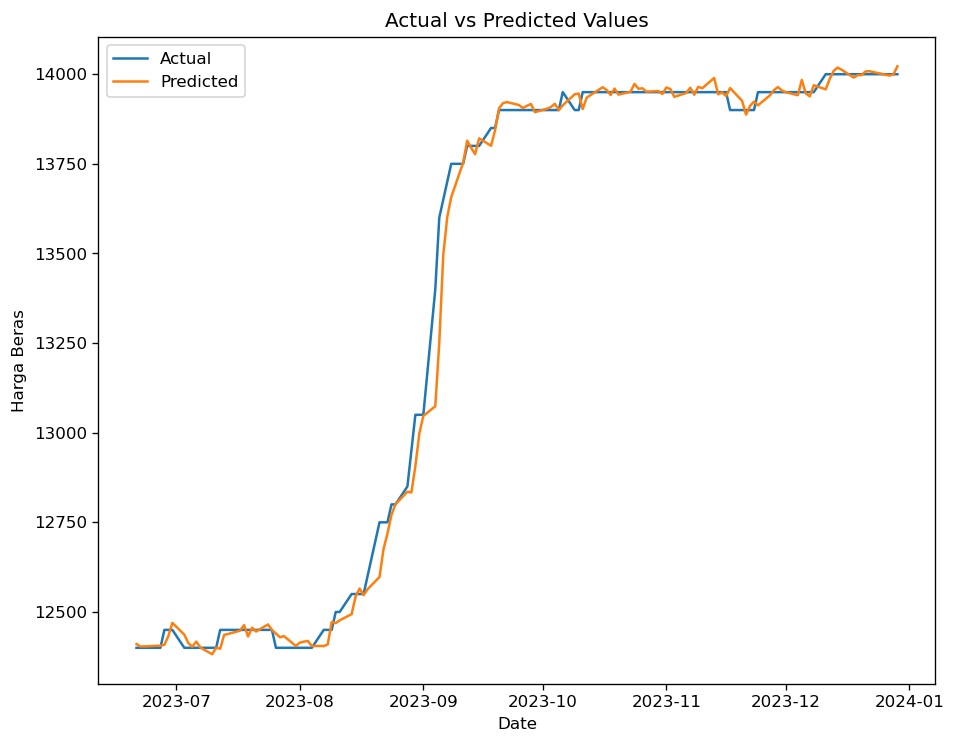

In [68]:
import matplotlib.pyplot as plt

# Plot the actual values
plt.plot(test_data.index, test_data['Harga Beras'], label='Actual')

# Plot the predicted values
plt.plot(test_data.index, forecast, label='Predicted')

plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Harga Beras')
plt.legend()

plt.show()

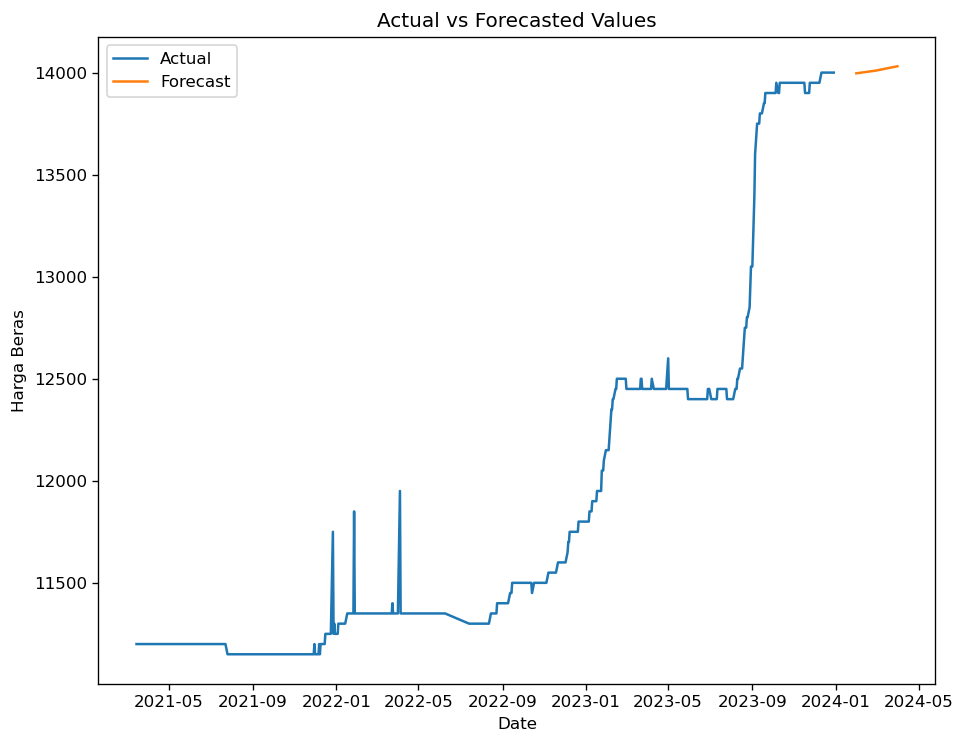

In [77]:
# Fit the model on the entire data
model_fit = model.fit(disp=False)

# Make prediction for the next 3 months
exog_future = dataset.drop('Harga Beras', axis=1).iloc[-3:]  # Get last 3 rows of exogenous data
forecast = model_fit.predict(len(dataset), len(dataset) + 2, exog=exog_future)

# Plot the actual values
plt.plot(dataset.index, dataset['Harga Beras'], label='Actual')

# Plot the forecasted values
forecast_index = pd.date_range(dataset.index[-1], periods=4, freq='M')[1:]  # Create a date range for the forecast
plt.plot(forecast_index, forecast, label='Forecast')

plt.title('Actual vs Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Harga Beras')
plt.legend()

plt.show()